# Ultrasonic Exploratory Data Analysis

This notebook will be exploring data from sensor using the version 2 platform.

The data collection procedure was as following
1. Mount arduino on the platform. During this Data collection we used arduino 1 only
2. Mount Ultrasonic Sensor that will be tested on to breadboard
3. Upload "automate_data_collection_v1.ino" and run "US_datacollection_v4.py"
4. Starting from delay 16800us and run "S" which is a sequence of datacollection that will automatically move the surface closer to ultrasonic sensor with set increments.
5. Repeat it by adjust delay into 10000us, 8000us,6000us, and 3000us 

## Load Data

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the folder path
folder_path = '../ultra_sonic_sensor/fully_automate/data_v4'

# Check if the folder exists and list the files
if os.path.exists(folder_path):
    # Generate list of file paths
    file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]
    print("List of CSV files:", file_paths)
else:
    print("Folder not found")

List of CSV files: ['../ultra_sonic_sensor/fully_automate/data_v4/test_seq_ard1_sensor3_13_47_48_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4/test_seq_ard1_sensor3_13_52_41_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4/test_seq_ard1_sensor6_14_30_37_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4/test_seq_ard1_sensor4_14_08_42_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4/test_seq_ard1_sensor4_14_01_09_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4/test_seq_ard1_sensor3_13_55_01_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4/test_seq_ard1_sensor1_13_05_40_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4/test_seq_ard1_sensor2_13_24_59_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4/test_seq_ard1_sensor4_14_06_20_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4/test_seq_ard1_sensor2_13_18_12_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4/test_seq_ard1_

In [3]:
def merge_csv_files(file_paths):
    """
    Merge multiple CSV files into a single DataFrame.

    Parameters:
    file_paths (list of str): List of file paths to the CSV files.

    Returns:
    DataFrame: Merged DataFrame containing data from all input CSV files.
    """
    dataframes = []
    for file in file_paths:
        df = pd.read_csv(file)
        dataframes.append(df)

    # Concatenate all DataFrames
    merged_df = pd.concat(dataframes, ignore_index=True)
    
    return merged_df

In [4]:
# Merge CSV files
merged_df = merge_csv_files(file_paths)
merged_df

,Trial,Ping Duration,Distance (cm),Ping Time (us),Delay (us),Steps,Arduino ID,Sensor ID,Range (cm),Sensor length (cm),...,Angle on XY plane,side a (cm),side b (cm),side c (cm),Angle on YZ plane,Sensor Configuration,Sensor Angle,Surface material,Surface Length (cm),Surface Width (cm)
0,0,3964,53,3039,16800,0,11,3,53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN
1,1,3964,53,3043,16800,0,11,3,53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN
2,2,3952,53,3035,16800,0,11,3,53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN
3,3,3956,53,3035,16800,0,11,3,53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN
4,4,3960,53,3039,16800,0,11,3,53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,95,11004,12,739,8000,10480,1,1,13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN
35996,96,11012,12,735,8000,10480,1,1,13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN
35997,97,11008,12,739,8000,10480,1,1,13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN
35998,98,11012,12,739,8000,10480,1,1,13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN


In [5]:
merged_df.columns

Index(['Trial', 'Ping Duration', 'Distance (cm)', 'Ping Time (us)',
       'Delay (us)', 'Steps', 'Arduino ID', 'Sensor ID', 'Range (cm)',
       'Sensor length (cm)', 'Color of sensor', 'Angle on XY plane',
       'side a (cm)', 'side b (cm)', 'side c (cm)', 'Angle on YZ plane',
       'Sensor Configuration', 'Sensor Angle', 'Surface material',
       'Surface Length (cm)', 'Surface Width (cm)'],
      dtype='object')

In [6]:
df_step_zero=merged_df[merged_df.Steps == 0 ]
df_step_zero

,Trial,Ping Duration,Distance (cm),Ping Time (us),Delay (us),Steps,Arduino ID,Sensor ID,Range (cm),Sensor length (cm),...,Angle on XY plane,side a (cm),side b (cm),side c (cm),Angle on YZ plane,Sensor Configuration,Sensor Angle,Surface material,Surface Length (cm),Surface Width (cm)
0,0,3964,53,3039,16800,0,11,3,53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN
1,1,3964,53,3043,16800,0,11,3,53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN
2,2,3952,53,3035,16800,0,11,3,53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN
3,3,3956,53,3035,16800,0,11,3,53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN
4,4,3960,53,3039,16800,0,11,3,53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34895,95,13316,53,3043,8000,0,1,1,53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN
34896,96,13316,53,3047,8000,0,1,1,53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN
34897,97,13316,53,3043,8000,0,1,1,53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN
34898,98,13316,53,3043,8000,0,1,1,53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wood,NaN,NaN


In [7]:
df_step_zero["Range (cm)"].unique()

array([53])

In [8]:
df_step_zero[df_step_zero["Range (cm)"] != 53]

,Trial,Ping Duration,Distance (cm),Ping Time (us),Delay (us),Steps,Arduino ID,Sensor ID,Range (cm),Sensor length (cm),...,Angle on XY plane,side a (cm),side b (cm),side c (cm),Angle on YZ plane,Sensor Configuration,Sensor Angle,Surface material,Surface Length (cm),Surface Width (cm)


### Clean data 

Remove columns with NaN. Currently NaN column are irrelevant so would be dropped

In [9]:
# Remove columns with any NaN values
cleaned_df = merged_df.dropna(axis=1)
cleaned_df

,Trial,Ping Duration,Distance (cm),Ping Time (us),Delay (us),Steps,Arduino ID,Sensor ID,Range (cm),Color of sensor,Surface material
0,0,3964,53,3039,16800,0,11,3,53,b,wood
1,1,3964,53,3043,16800,0,11,3,53,b,wood
2,2,3952,53,3035,16800,0,11,3,53,b,wood
3,3,3956,53,3035,16800,0,11,3,53,b,wood
4,4,3960,53,3039,16800,0,11,3,53,b,wood
...,...,...,...,...,...,...,...,...,...,...,...
35995,95,11004,12,739,8000,10480,1,1,13,b,wood
35996,96,11012,12,735,8000,10480,1,1,13,b,wood
35997,97,11008,12,739,8000,10480,1,1,13,b,wood
35998,98,11012,12,739,8000,10480,1,1,13,b,wood


In [10]:
# Function to visualize the effect of delay and range on ping time
def visualize_delay_and_range_effect_on_ping_time(df):
    """
    Visualize the effect of delay and range on ping time.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    """
    
    # Group by sensor ID, delay, and range, then calculate the mean ping time
    grouped_df = df.groupby(['Sensor ID', 'Delay (us)', 'Range (cm)'])['Ping Time (us)'].mean().reset_index()
    
    # Create the visualization
    g = sns.catplot(
        x='Sensor ID', 
        y='Ping Time (us)', 
        hue='Delay (us)', 
        col='Range (cm)', 
        data=grouped_df, 
        kind='bar', 
        height=4, 
        aspect=0.7
    )
    
    # Add horizontal lines for correct ping times based on range
    for ax in g.axes.flatten():
        range_val = float(ax.get_title().split('=')[1].strip())
        correct_ping_time = (2 * range_val / 100) / 343 * 1e6
        ax.axhline(correct_ping_time, color='red', linestyle='--', linewidth=2, label='Correct Ping Time')
    
    plt.subplots_adjust(top=0.9)
    plt.suptitle('Effect of Delay and Range on Ping Time by Sensor ID')
    plt.legend()
    plt.show()


# Visualize the effect of delay and range on ping time
visualize_delay_and_range_effect_on_ping_time(cleaned_df)


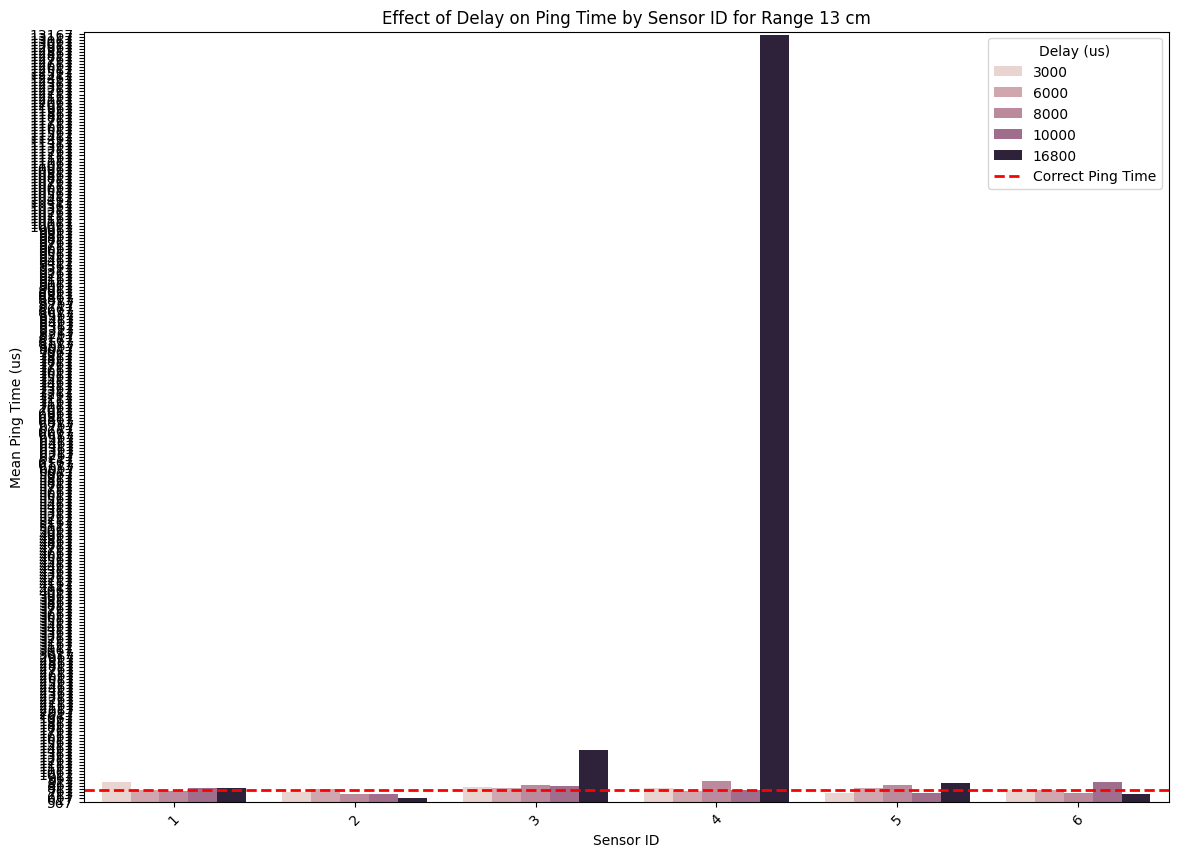

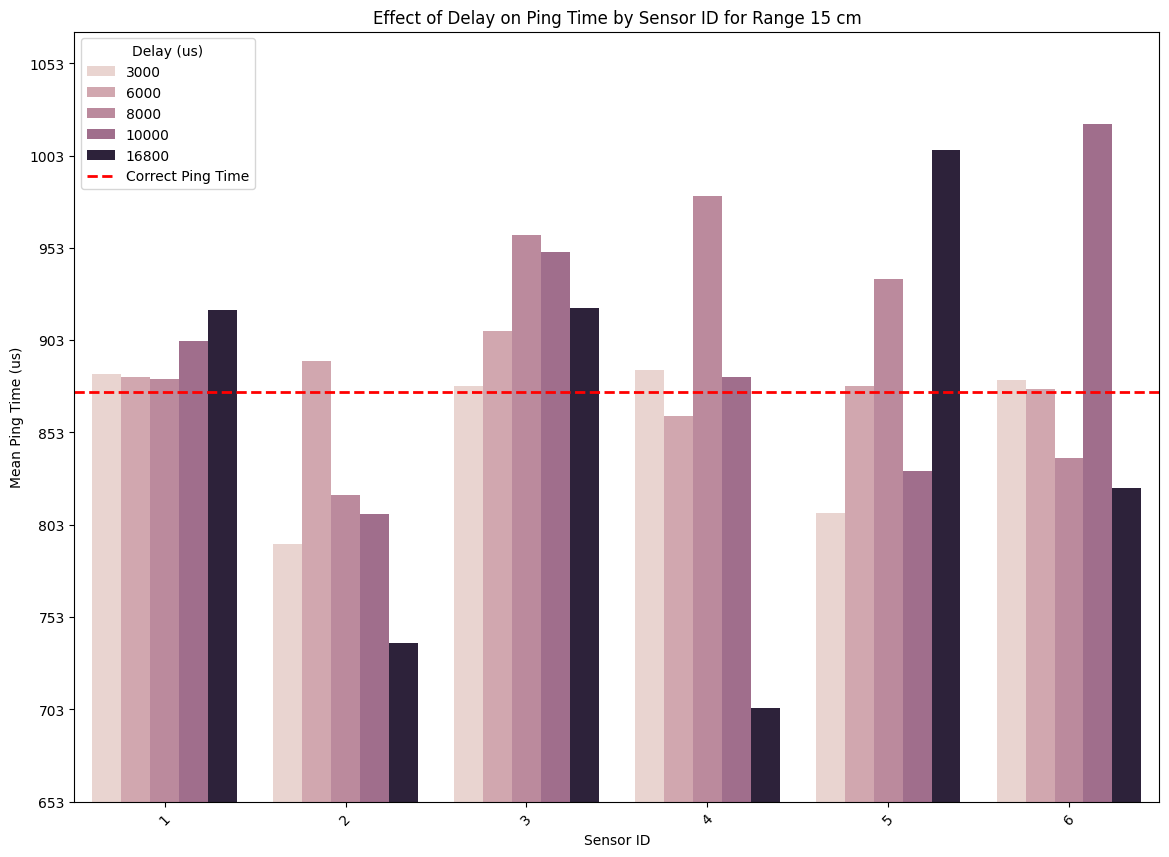

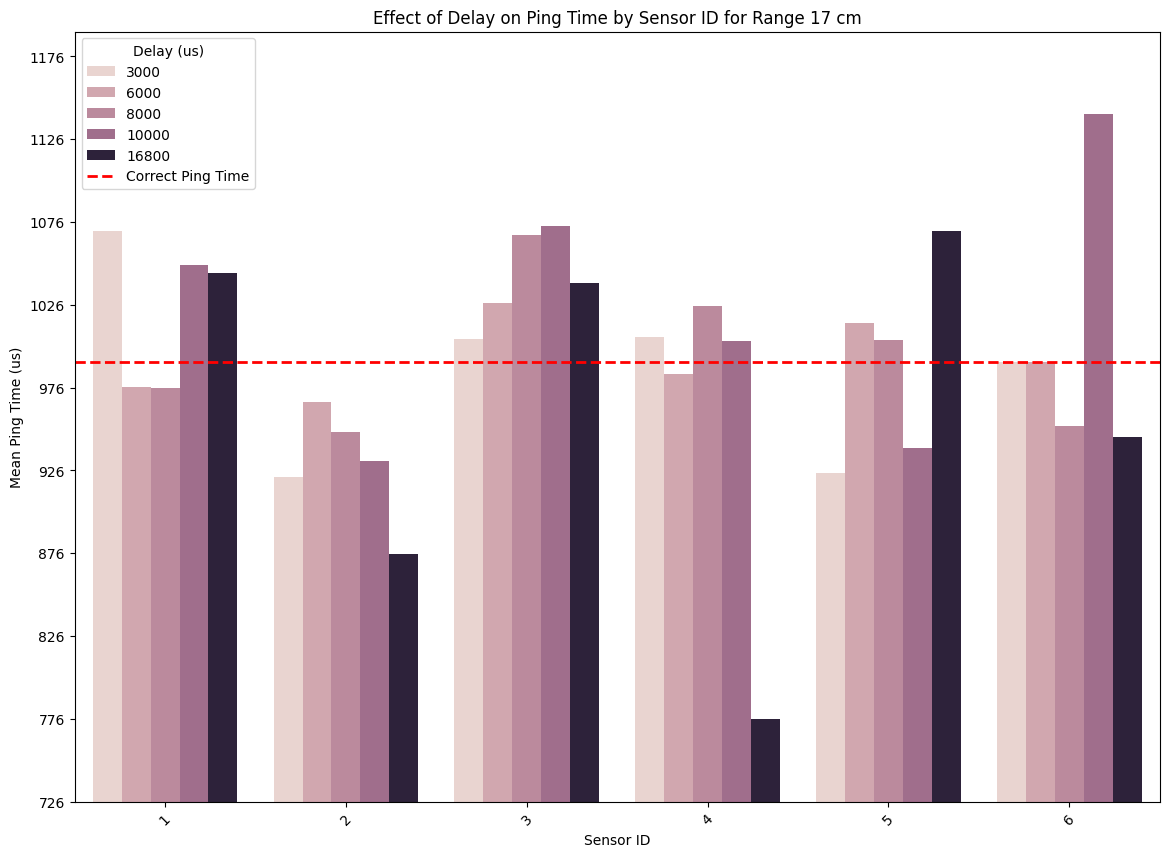

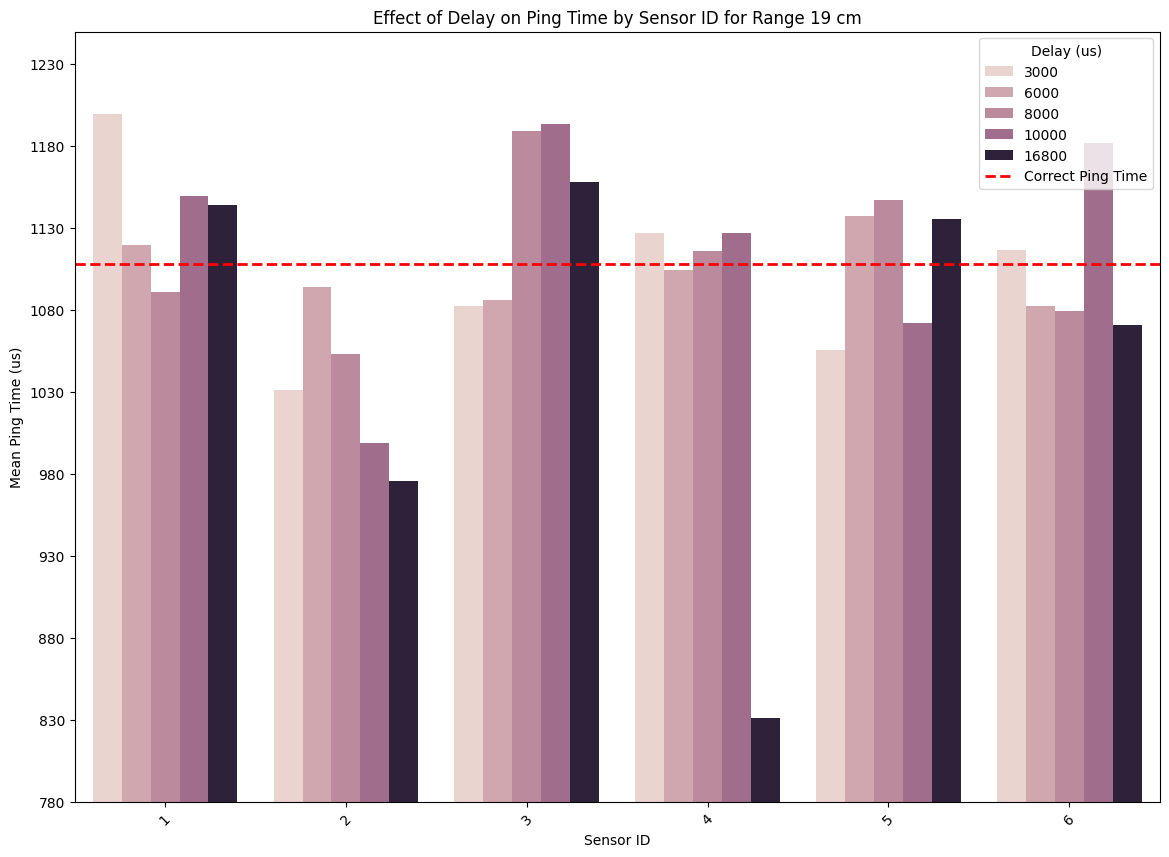

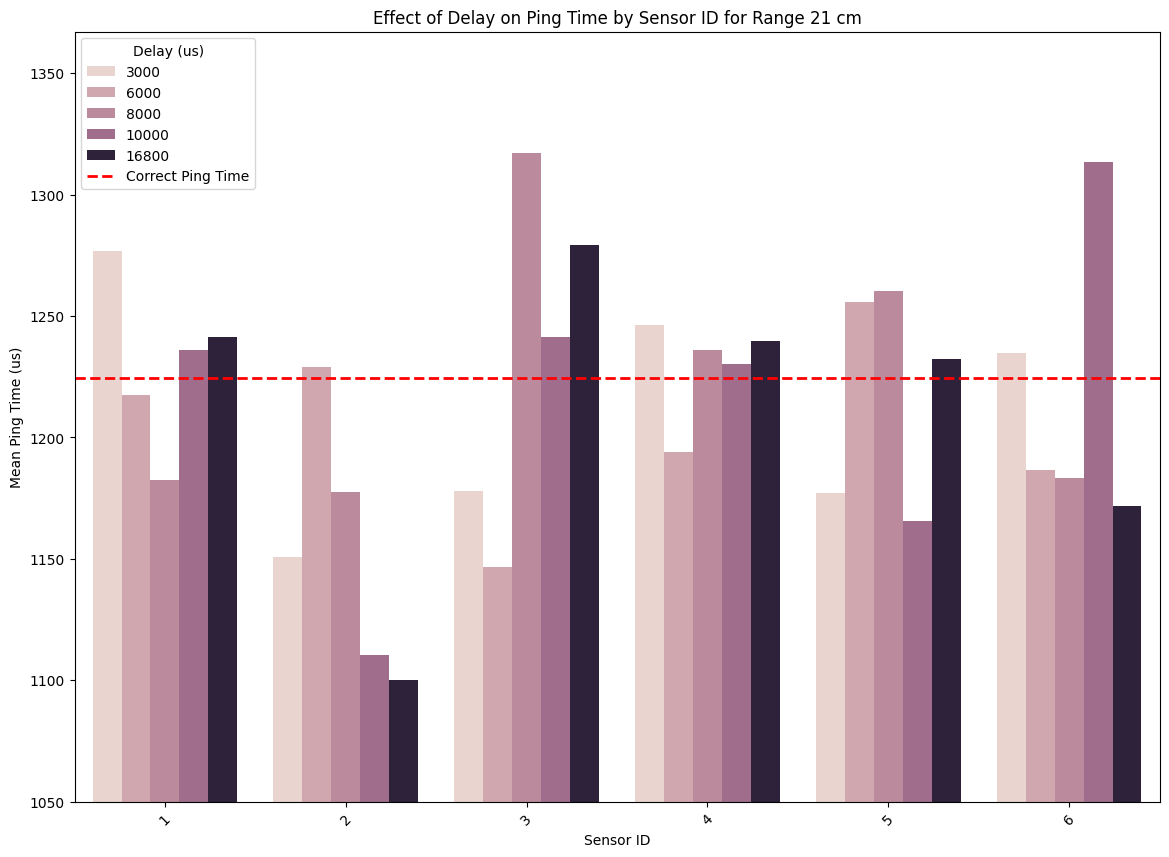

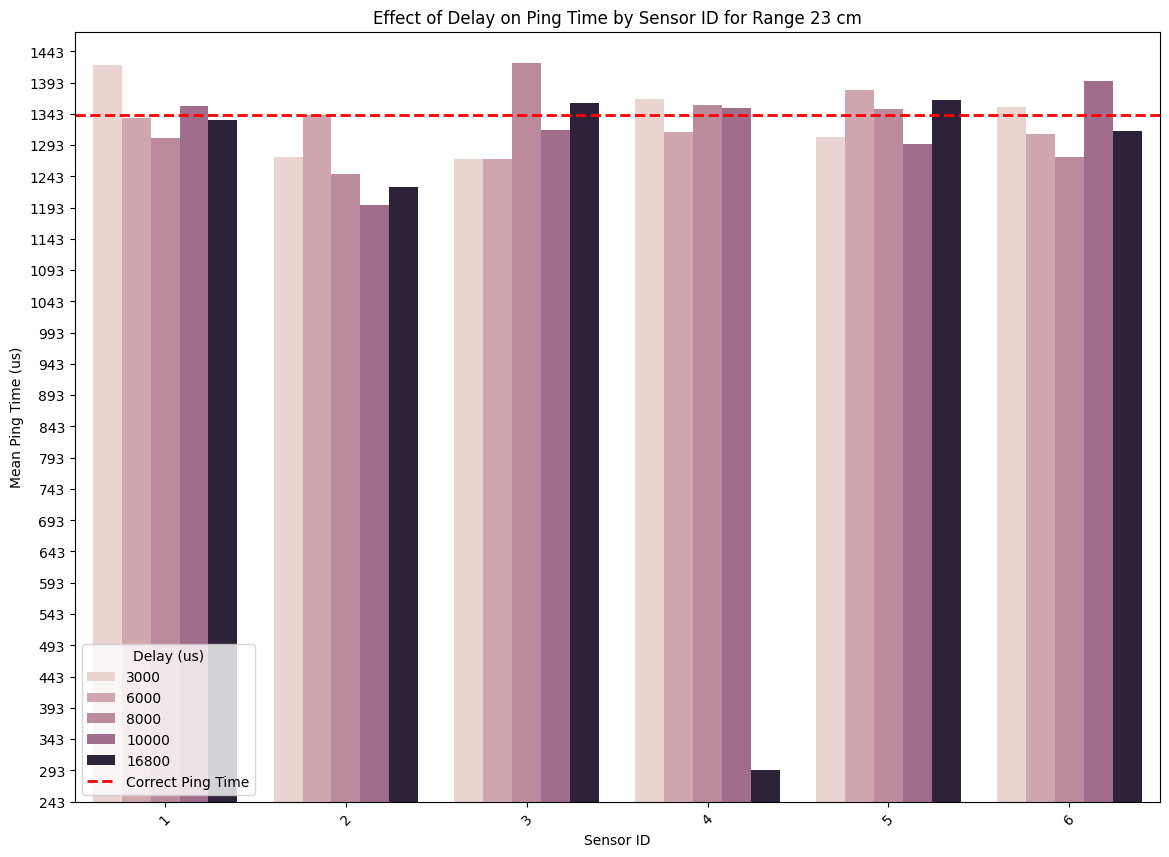

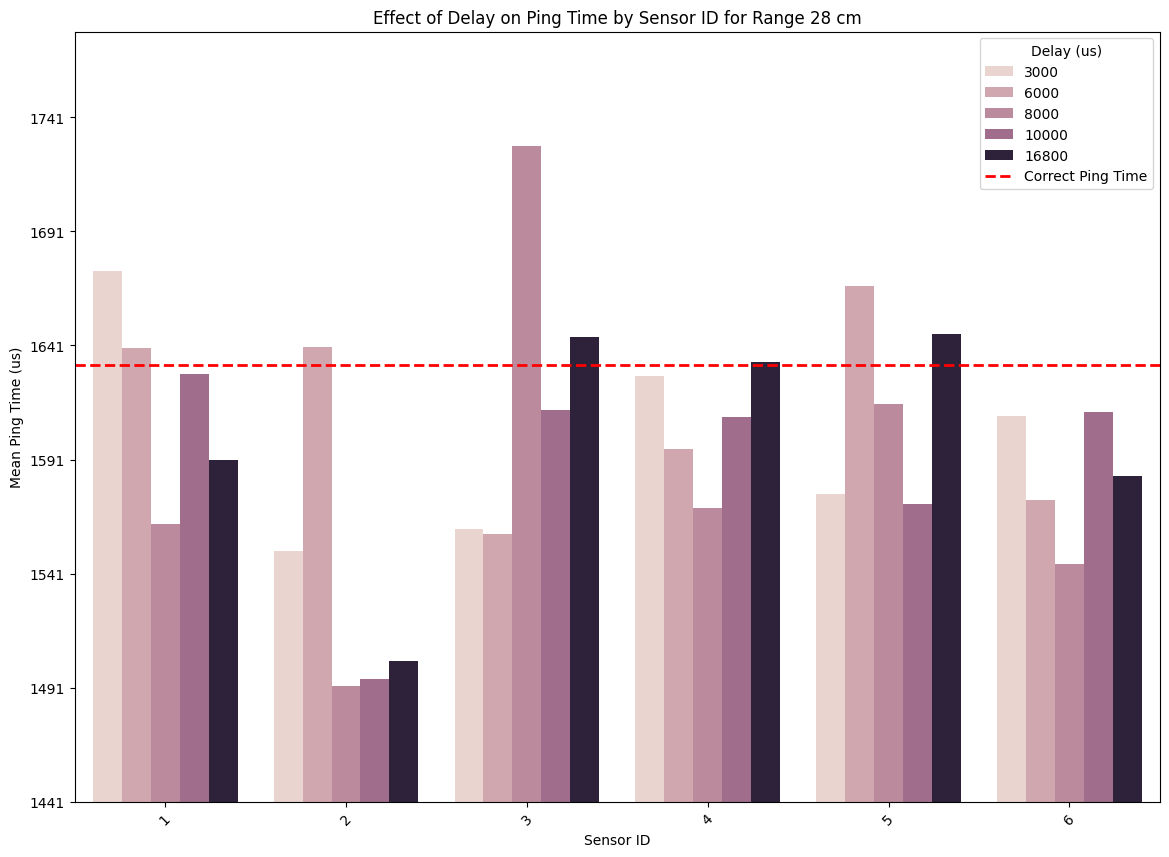

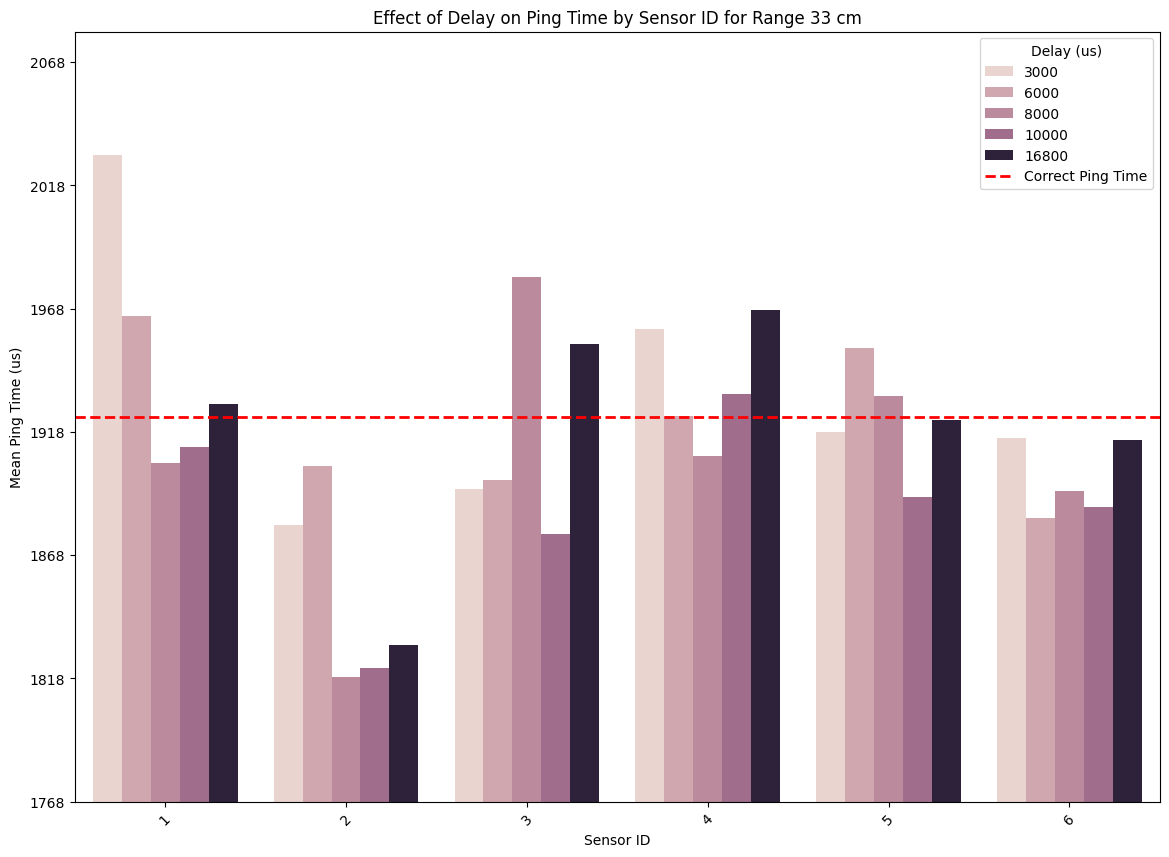

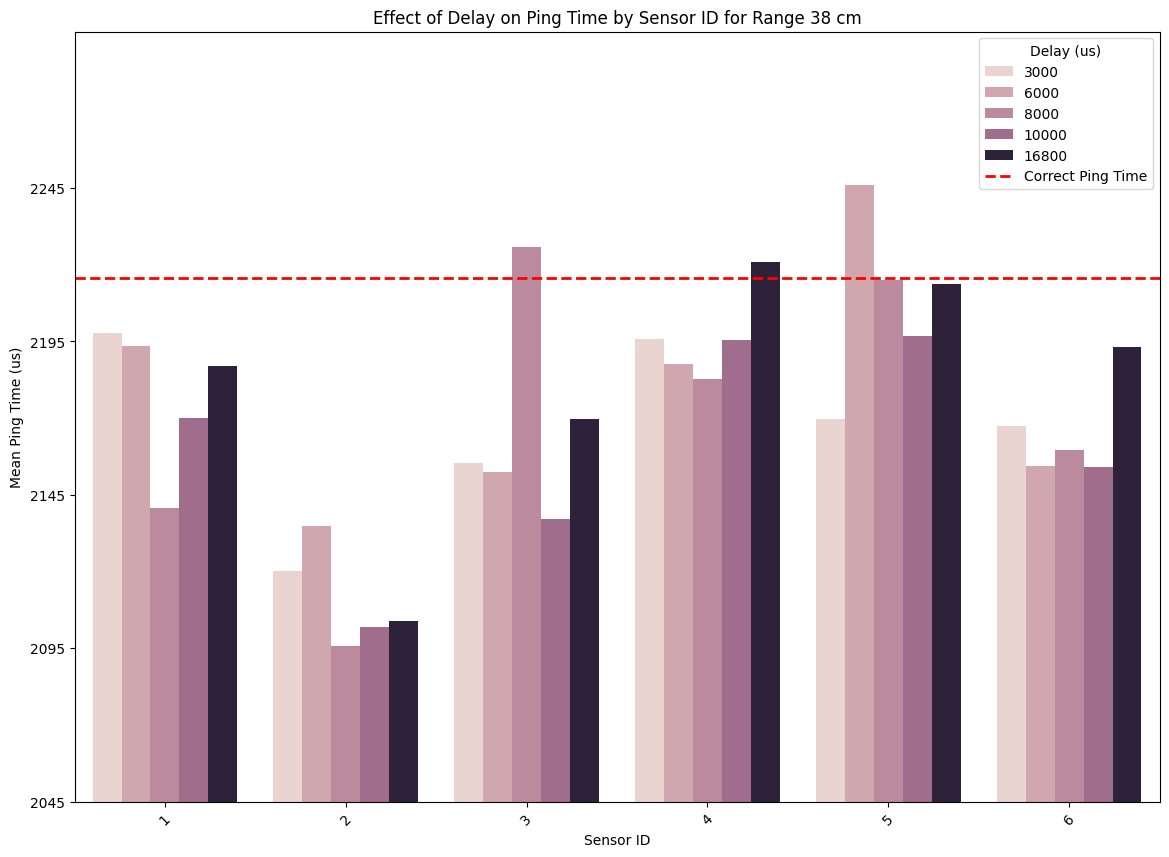

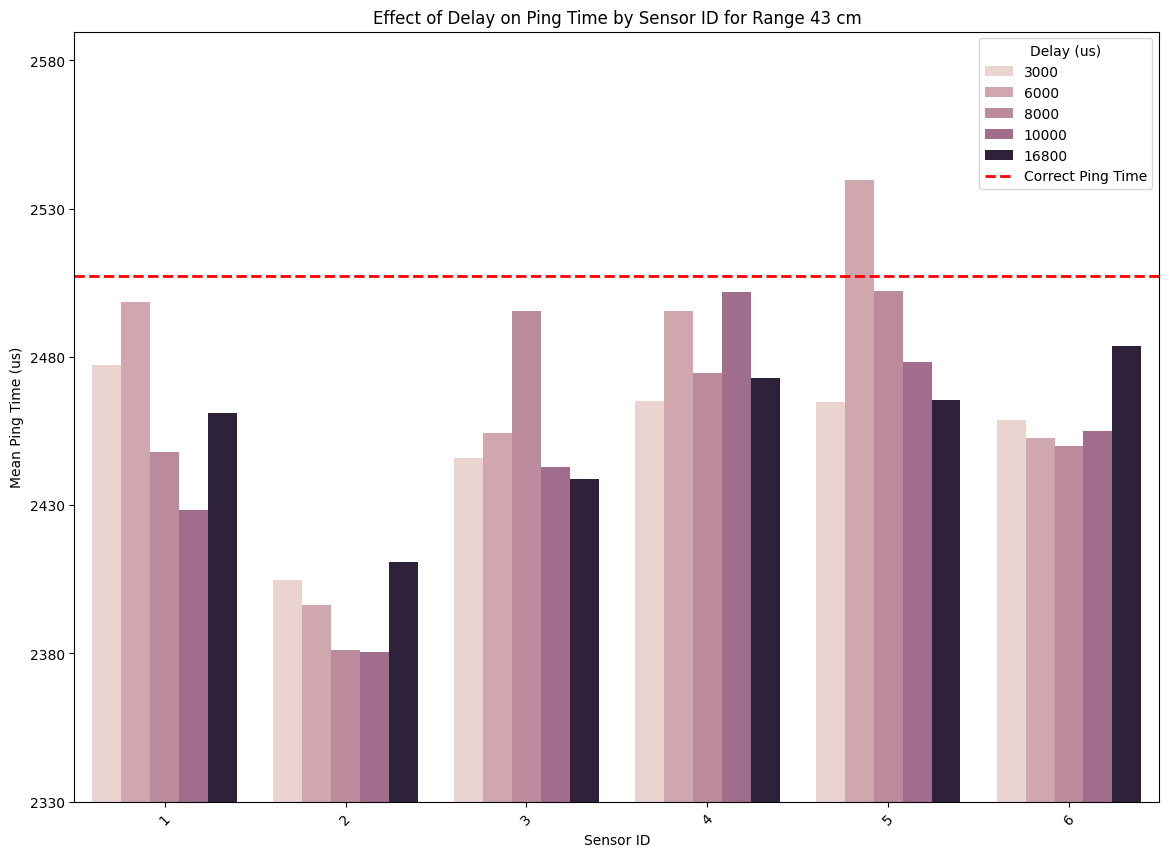

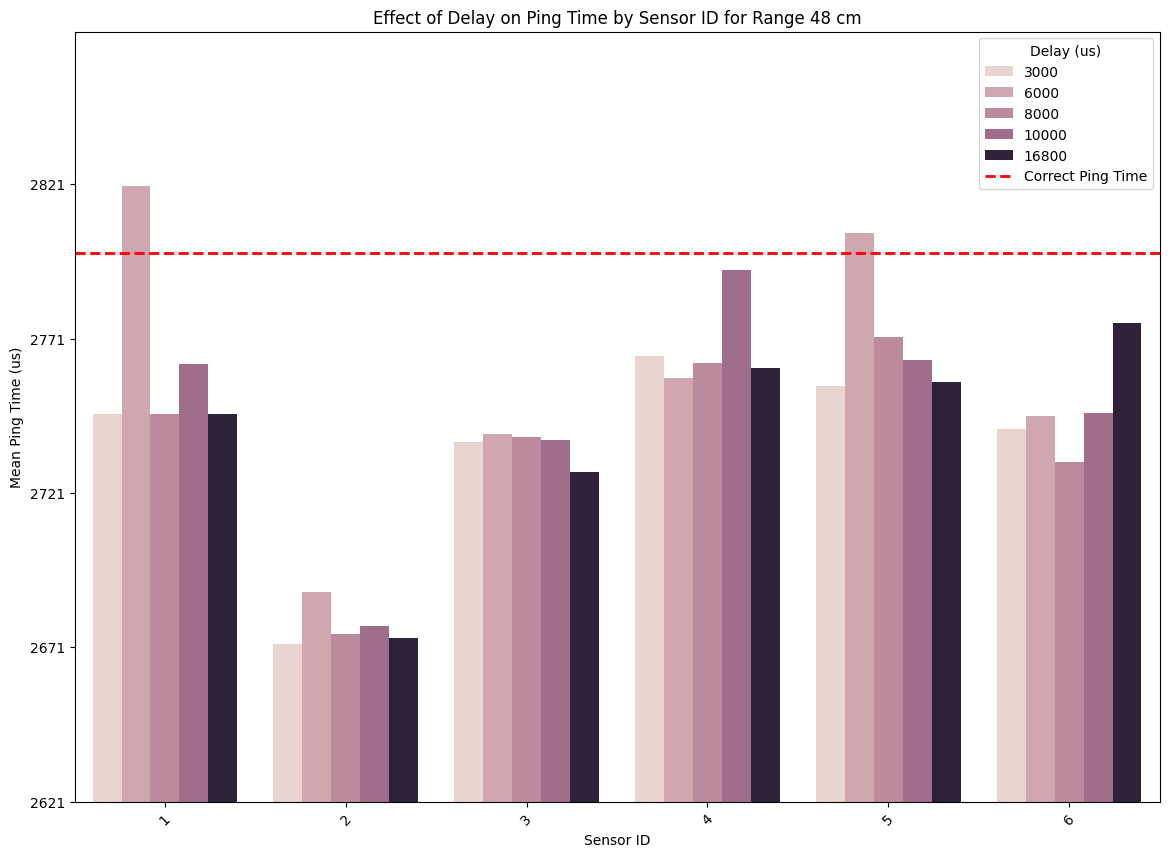

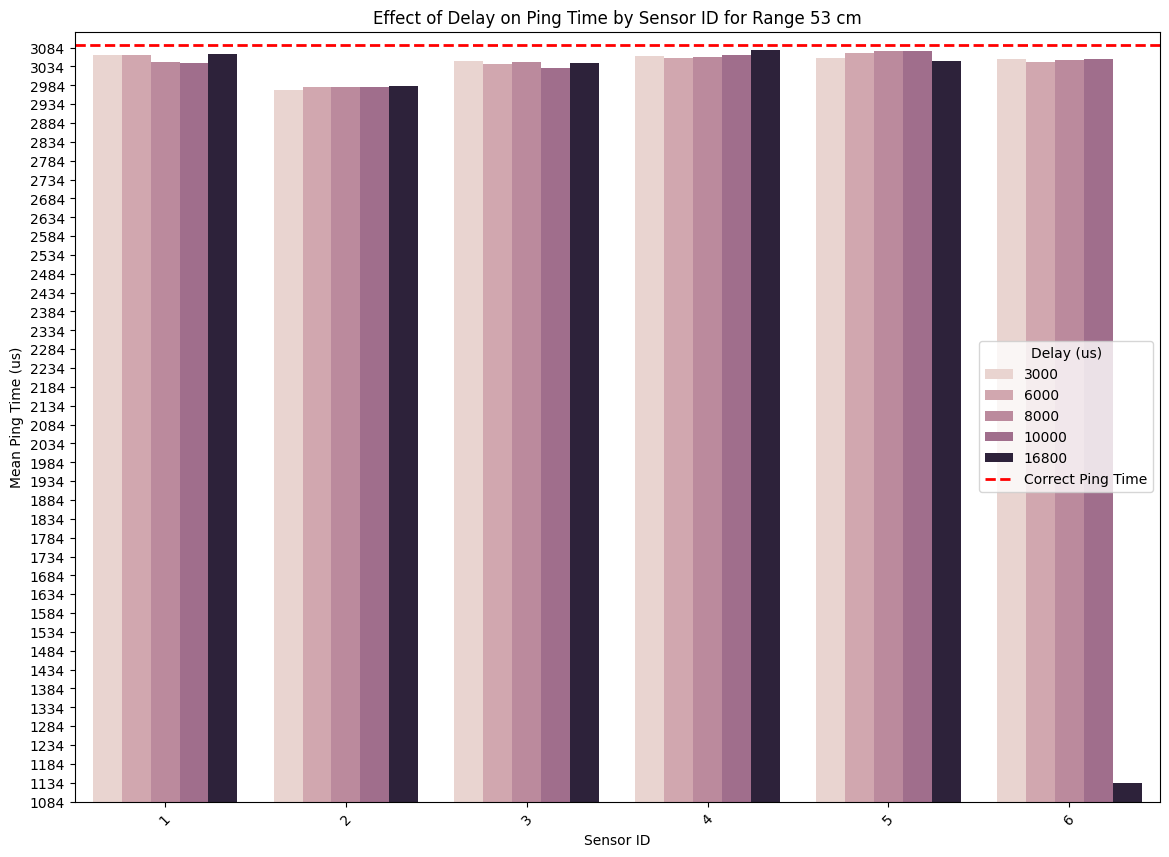

In [ ]:
# Function to visualize the effect of delay and range on ping time
def visualize_delay_and_range_effect_on_ping_time(df):
    """
    Visualize the effect of delay and range on ping time.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    """
    # Group by sensor ID, delay, and range, then calculate the mean ping time
    grouped_df = df.groupby(['Sensor ID', 'Delay (us)', 'Range (cm)'])['Ping Time (us)'].mean().reset_index()
    
    # Create individual plots for each range
    unique_ranges = grouped_df['Range (cm)'].unique()
    
    for range_val in unique_ranges:
        subset_df = grouped_df[grouped_df['Range (cm)'] == range_val]
        plt.figure(figsize=(14, 10))
        sns.barplot(
            x='Sensor ID', 
            y='Ping Time (us)', 
            hue='Delay (us)', 
            data=subset_df
        )
        
        correct_ping_time = (2 * range_val / 100) / 343 * 1e6
        plt.axhline(correct_ping_time, color='red', linestyle='--', linewidth=2, label='Correct Ping Time')
        
        plt.title(f'Effect of Delay on Ping Time by Sensor ID for Range {range_val} cm')
        plt.xlabel('Sensor ID')
        plt.ylabel('Mean Ping Time (us)')
        plt.legend(title='Delay (us)')
        plt.xticks(rotation=45)
        # Adjust y-axis limits and ticks for better precision
        min_ping_time = subset_df['Ping Time (us)'].min()
        max_ping_time = subset_df['Ping Time (us)'].max()
        plt.ylim(min_ping_time - 50, max_ping_time + 50)  # Adjust the limits as needed
        plt.yticks(range(int(min_ping_time) - 50, int(max_ping_time) + 50, 50))  # Adjust the step as needed
        plt.show()

visualize_delay_and_range_effect_on_ping_time(cleaned_df)

## Identifying outliers and doing outlier analysis

In [ ]:
def identify_and_remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    df_outliers_lower = df[(df[column] <= lower_bound)]
    df_outliers_upper = df[(df[column] >= upper_bound)]
    return df_no_outliers,df_outliers_lower,df_outliers_upper

In [ ]:
# Group the data by 'Sensor ID', 'Delay (us)', and 'Range (cm)'
cleaned_data = cleaned_df.copy()
grouped = cleaned_data.groupby(['Sensor ID', 'Delay (us)', 'Range (cm)'])

# Identify and remove outliers for each group
removed_outliers = []
outliers_lower = []
outliers_upper = []

for name, group in grouped:
    cleaned_group = group.copy()
    for column in ['Ping Time (us)']:
        no_outliers_group,outliers_lower_group,outliers_upper_group = identify_and_remove_outliers(cleaned_group, column)
    removed_outliers.append(no_outliers_group)
    outliers_lower.append(outliers_lower_group)
    outliers_upper.append(outliers_upper_group)

In [ ]:
# Combine the cleaned groups into a single DataFrame
df_removed_outliers = pd.concat(removed_outliers)
df_outliers_lower = pd.concat(outliers_lower)
df_outliers_upper = pd.concat(outliers_upper)

In [ ]:
df_removed_outliers

,Trial,Ping Duration,Distance (cm),Ping Time (us),Delay (us),Steps,Arduino ID,Sensor ID,Range (cm),Color of sensor,Surface material
31103,3,6124,15,883,3000,10480,1,1,13,b,wood
31104,4,6124,15,883,3000,10480,1,1,13,b,wood
31105,5,6128,15,883,3000,10480,1,1,13,b,wood
31107,7,6124,15,883,3000,10480,1,1,13,b,wood
31108,8,6128,15,883,3000,10480,1,1,13,b,wood
...,...,...,...,...,...,...,...,...,...,...,...
32495,95,1996,18,1067,16800,0,1,6,53,b,wood
32496,96,2108,20,1179,16800,0,1,6,53,b,wood
32497,97,2020,19,1091,16800,0,1,6,53,b,wood
32498,98,2108,20,1187,16800,0,1,6,53,b,wood


In [ ]:
df_outliers_lower

,Trial,Ping Duration,Distance (cm),Ping Time (us),Delay (us),Steps,Arduino ID,Sensor ID,Range (cm),Color of sensor,Surface material
31100,0,6148,15,879,3000,10480,1,1,13,b,wood
31101,1,6148,15,879,3000,10480,1,1,13,b,wood
31102,2,6148,15,879,3000,10480,1,1,13,b,wood
31134,34,6124,15,879,3000,10480,1,1,13,b,wood
31137,37,6124,15,879,3000,10480,1,1,13,b,wood
...,...,...,...,...,...,...,...,...,...,...,...
32400,0,1368,7,439,16800,0,1,6,53,b,wood
32402,2,1492,9,559,16800,0,1,6,53,b,wood
32404,4,1560,11,627,16800,0,1,6,53,b,wood
32406,6,1656,12,727,16800,0,1,6,53,b,wood


In [ ]:
df_outliers_upper

,Trial,Ping Duration,Distance (cm),Ping Time (us),Delay (us),Steps,Arduino ID,Sensor ID,Range (cm),Color of sensor,Surface material
31106,6,6128,15,887,3000,10480,1,1,13,b,wood
31109,9,6128,15,887,3000,10480,1,1,13,b,wood
31112,12,6128,15,887,3000,10480,1,1,13,b,wood
31115,15,6128,15,887,3000,10480,1,1,13,b,wood
31116,16,6128,15,887,3000,10480,1,1,13,b,wood
...,...,...,...,...,...,...,...,...,...,...,...
32401,1,2660,30,1731,16800,0,1,6,53,b,wood
32403,3,2592,29,1659,16800,0,1,6,53,b,wood
32405,5,2520,27,1595,16800,0,1,6,53,b,wood
32407,7,2428,26,1495,16800,0,1,6,53,b,wood


In [ ]:
def visualize_stacked_box_plots(df):
    """
    Visualize the effect of range on ping time using stacked box plots for each delay.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    """
    # Get unique delay values
    unique_ranges = df['Range (cm)'].unique()
    
    for range_val in unique_ranges:
        subset_df = df[df['Range (cm)'] == range_val]
        plt.figure(figsize=(16, 12))
        sns.boxplot(
            x='Sensor ID', 
            y='Ping Time (us)', 
            hue='Delay (us)', 
            data=subset_df
        )
        correct_ping_time = (2 * range_val / 100) / 343 * 1e6
        plt.axhline(correct_ping_time, color='red', linestyle='--', linewidth=2, label='Correct Ping Time')
                
        plt.title(f'Stacked Box Plot of Ping Time (us) Grouped by Delay (us) for Range {range_val} cm')
        plt.xlabel('Sensor ID')
        plt.ylabel('Ping Time (us)')
        plt.legend(title='Sensor ID', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.xticks(rotation=45)
        # Adjust y-axis limits for better precision
        min_ping_time = subset_df['Ping Time (us)'].min()
        max_ping_time = subset_df['Ping Time (us)'].max()
        plt.ylim(min_ping_time - 50, max_ping_time + 50)  # Adjust the limits as needed
        plt.show()

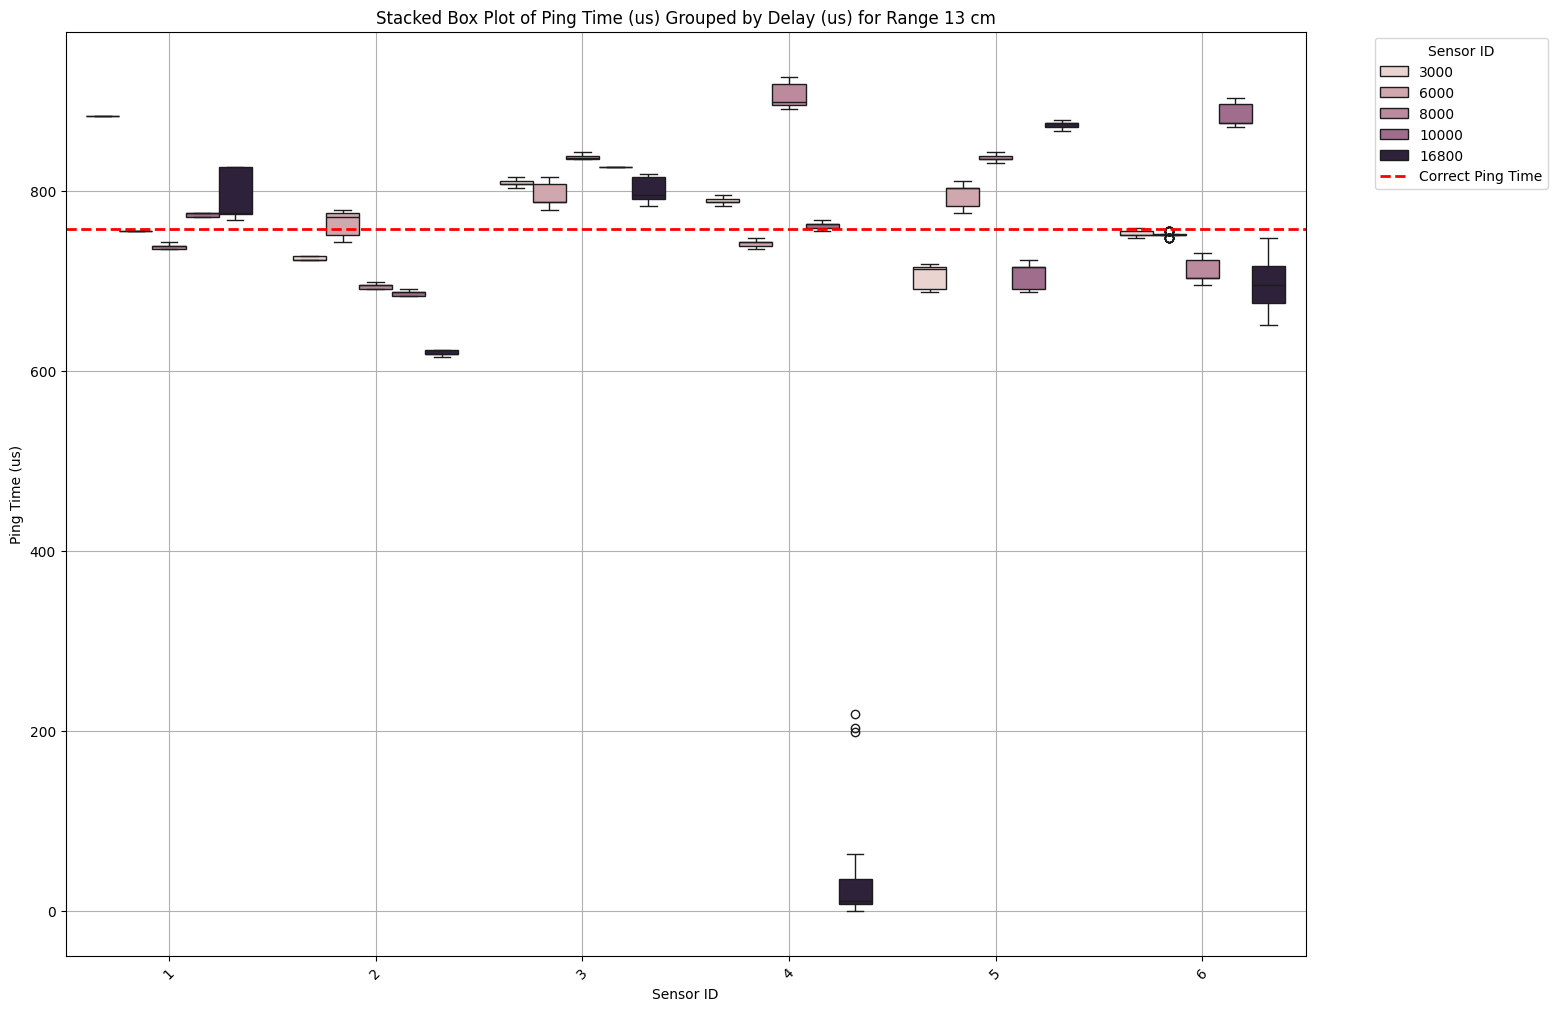

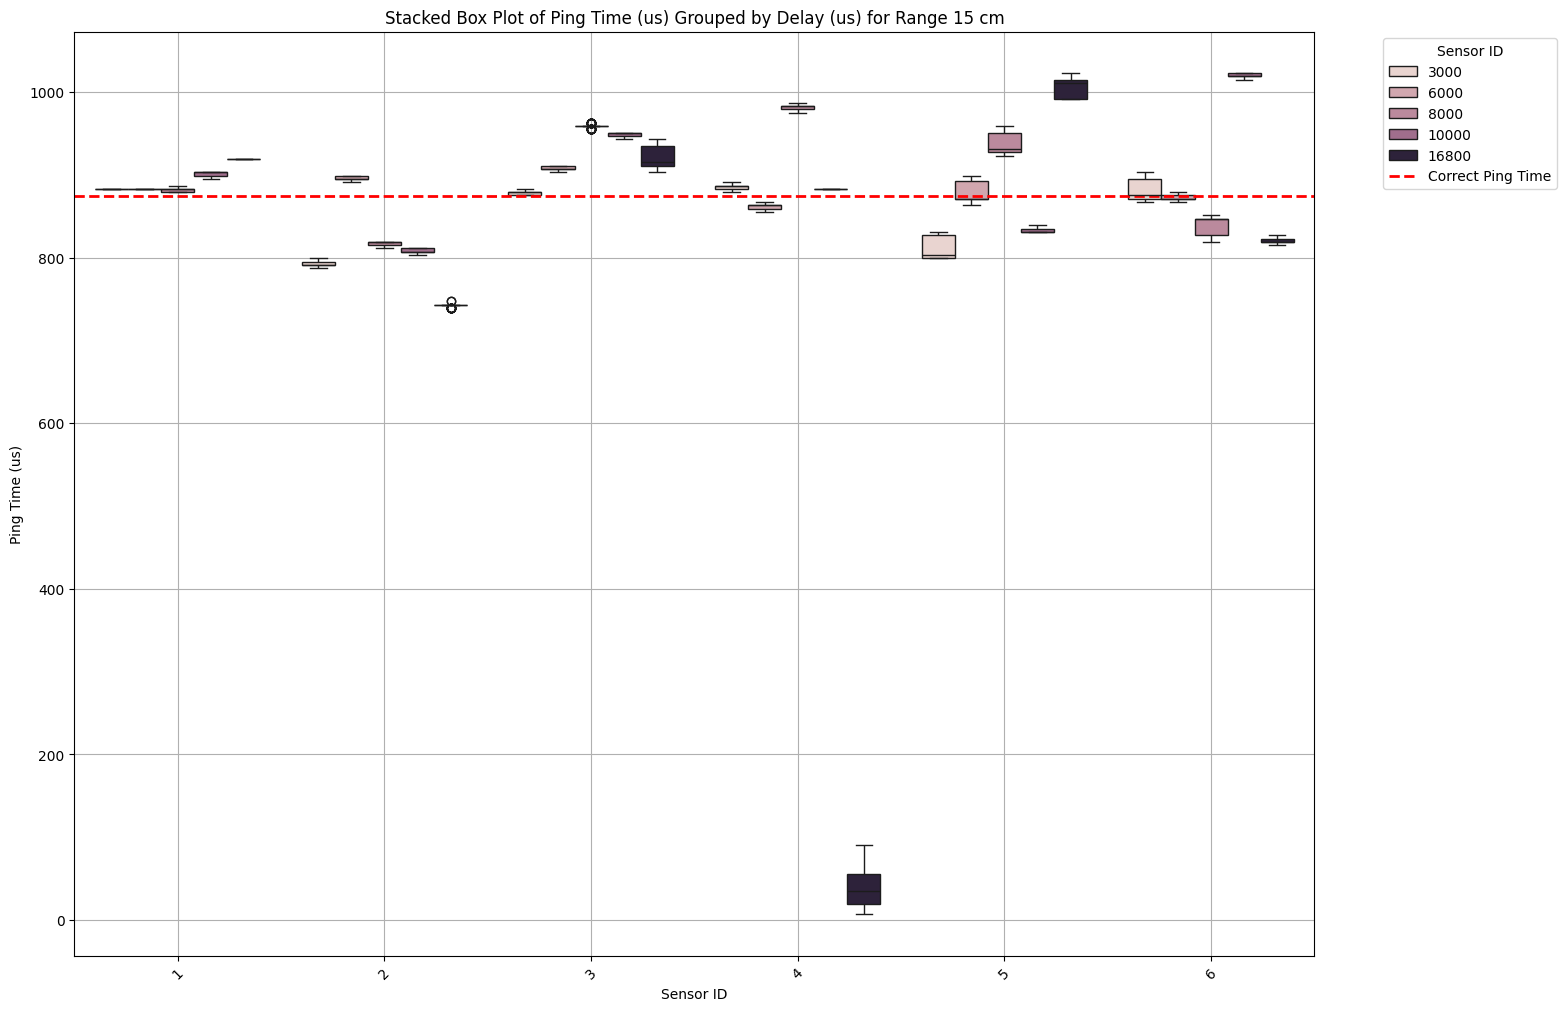

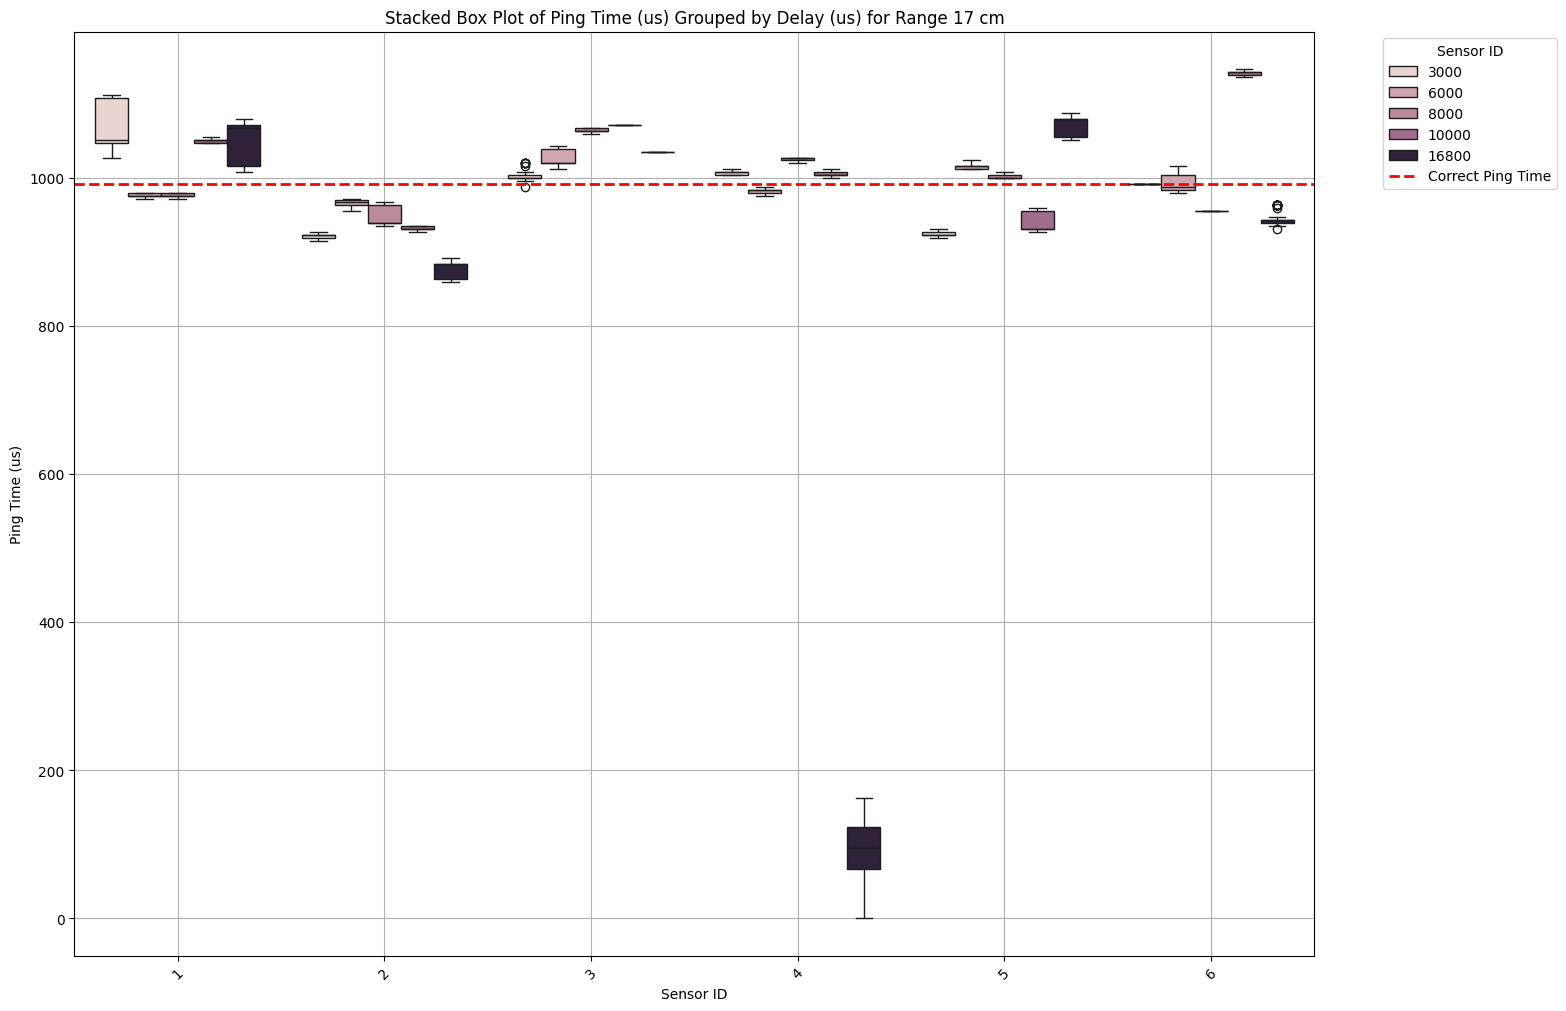

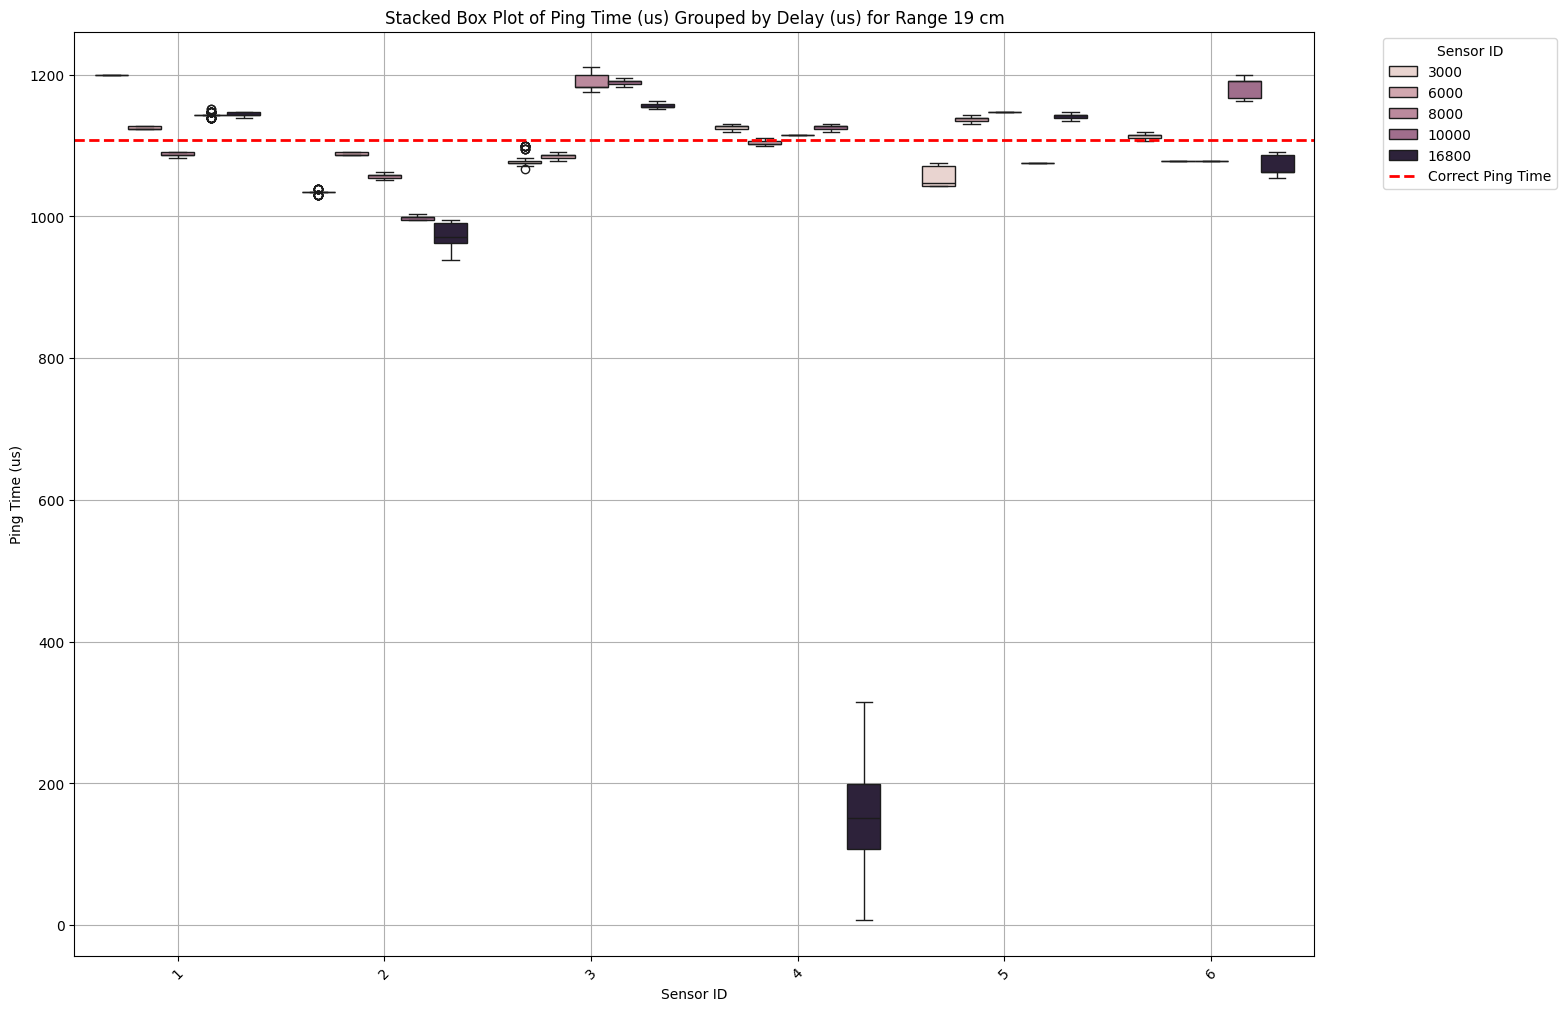

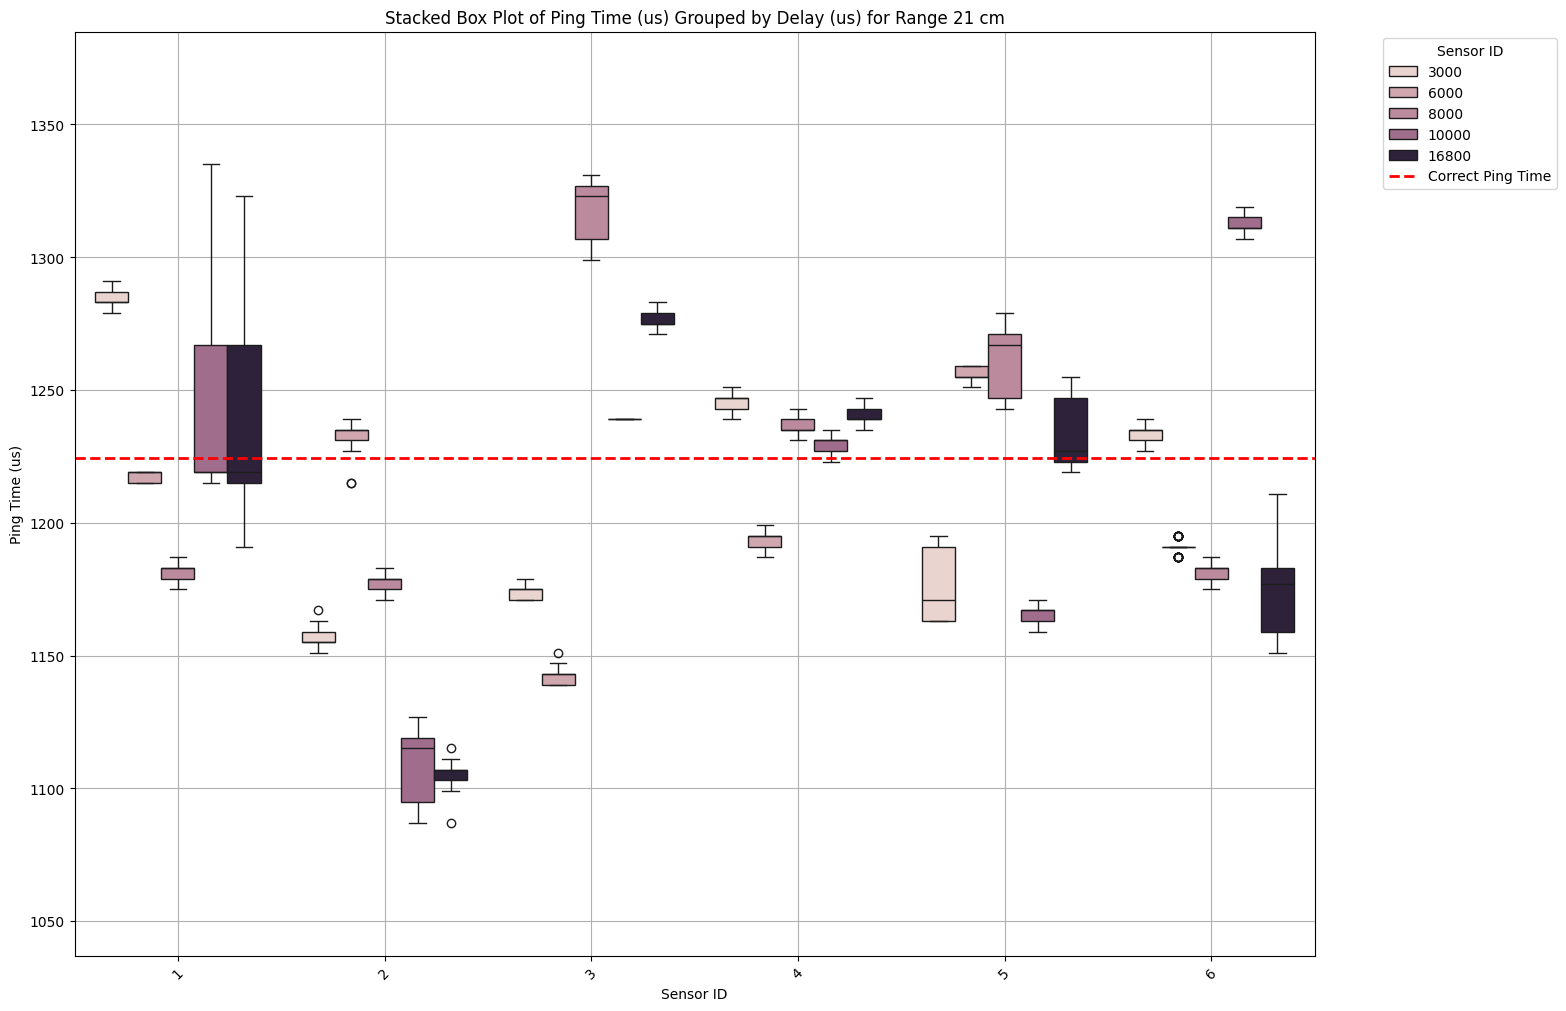

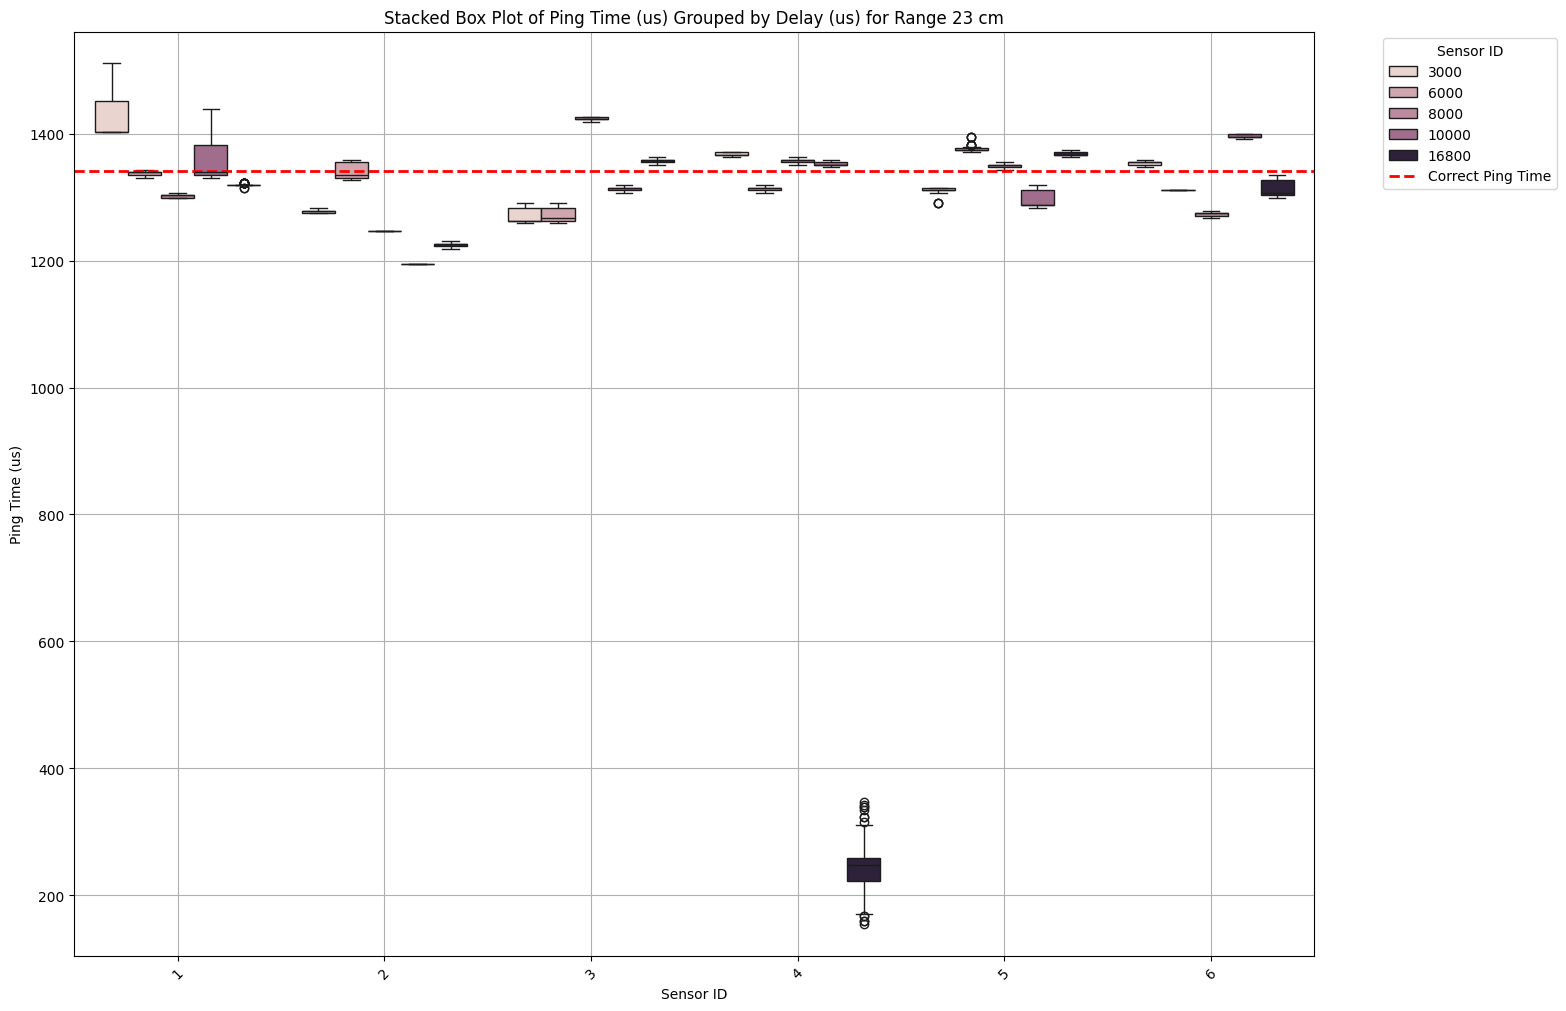

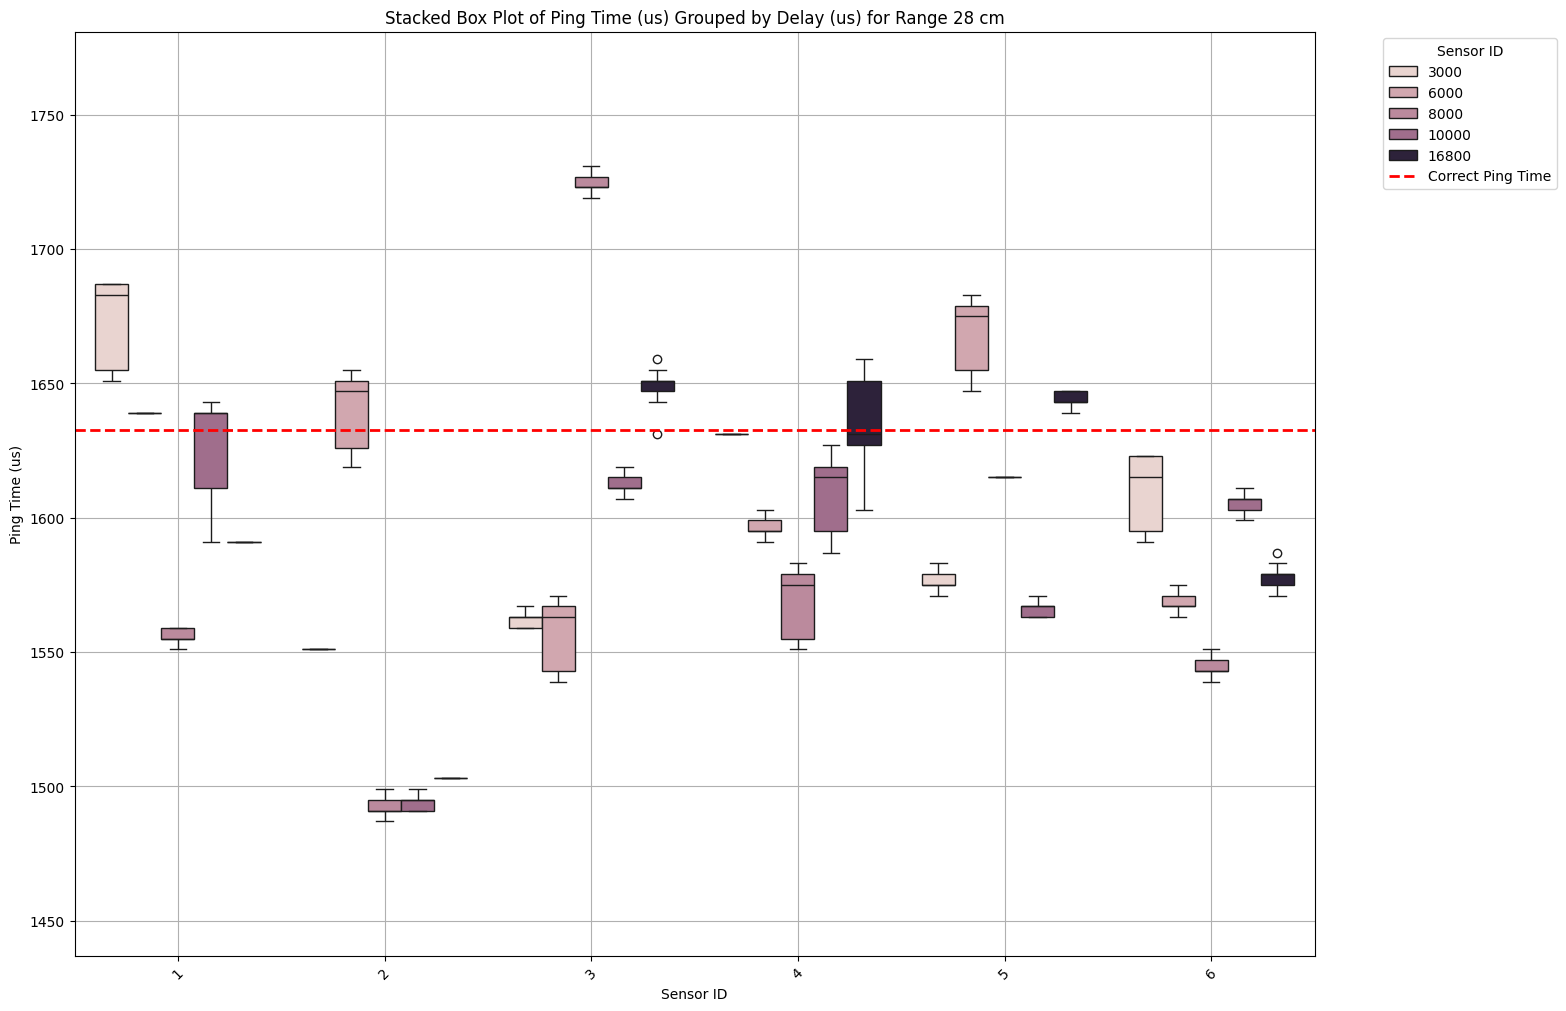

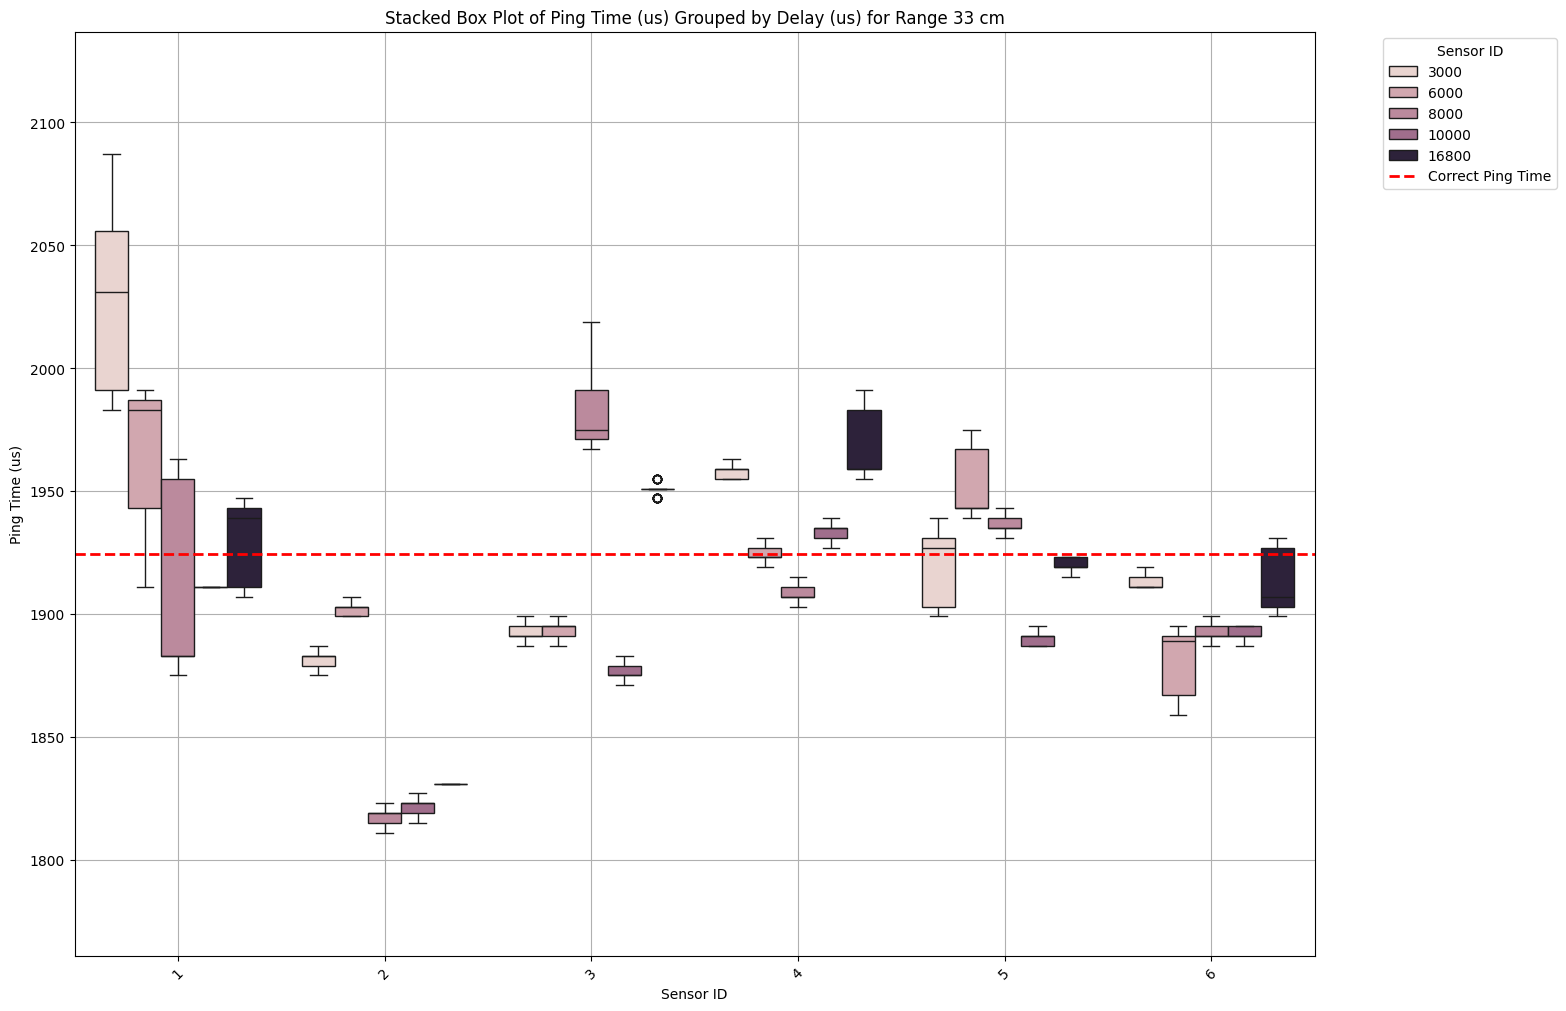

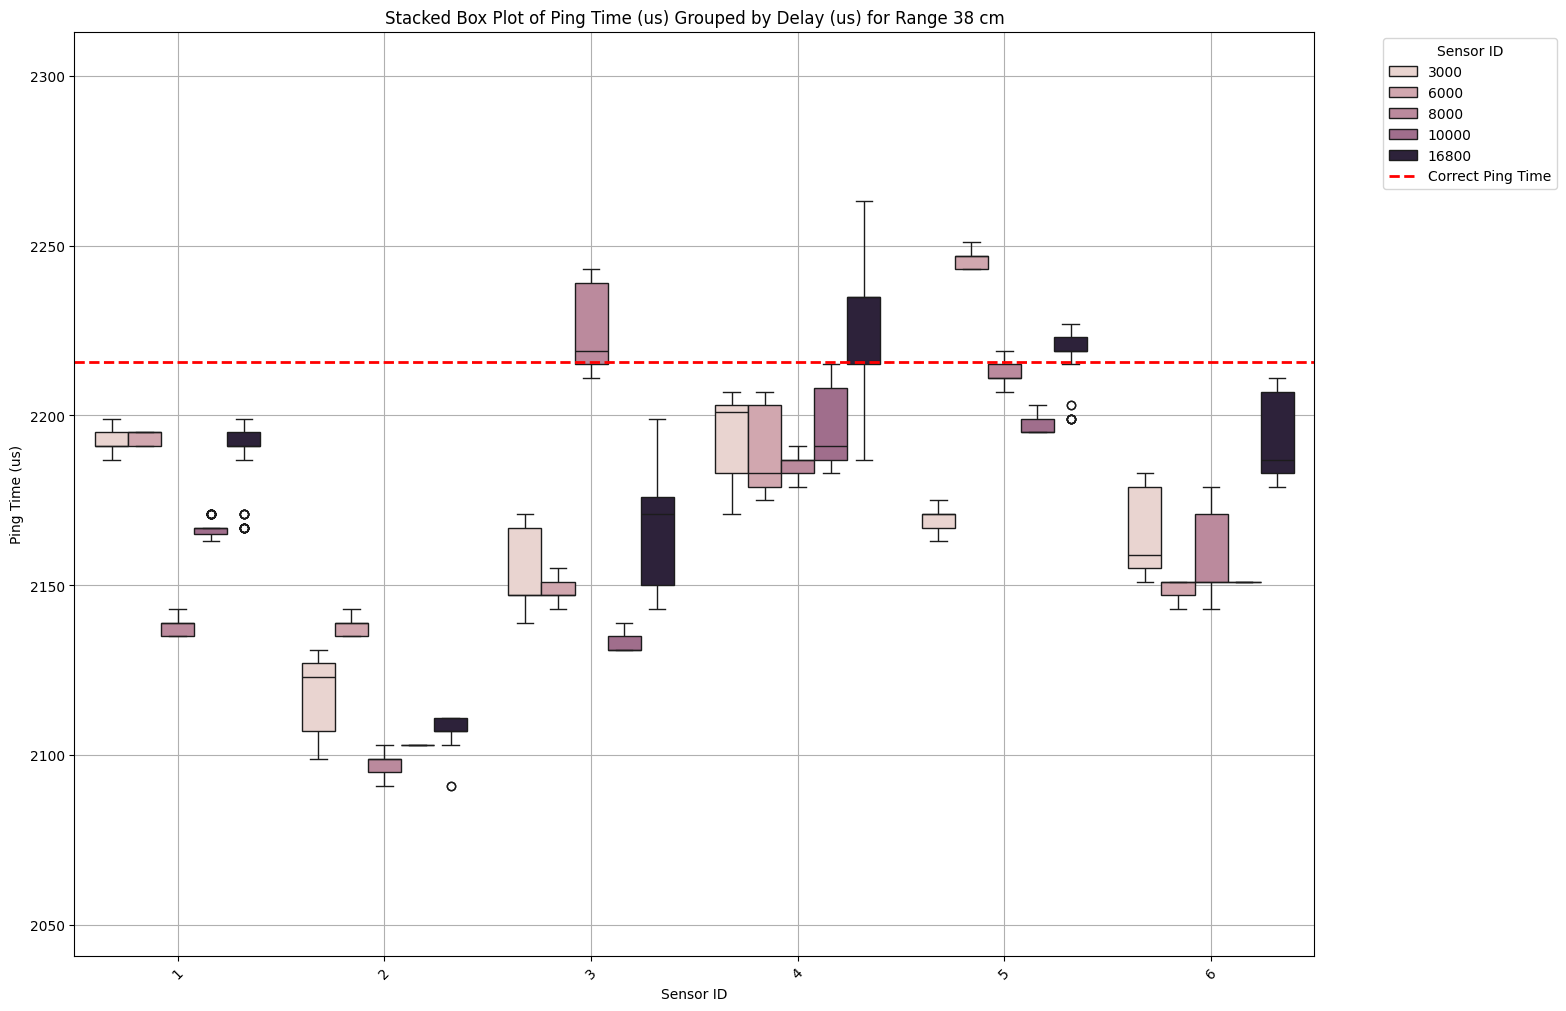

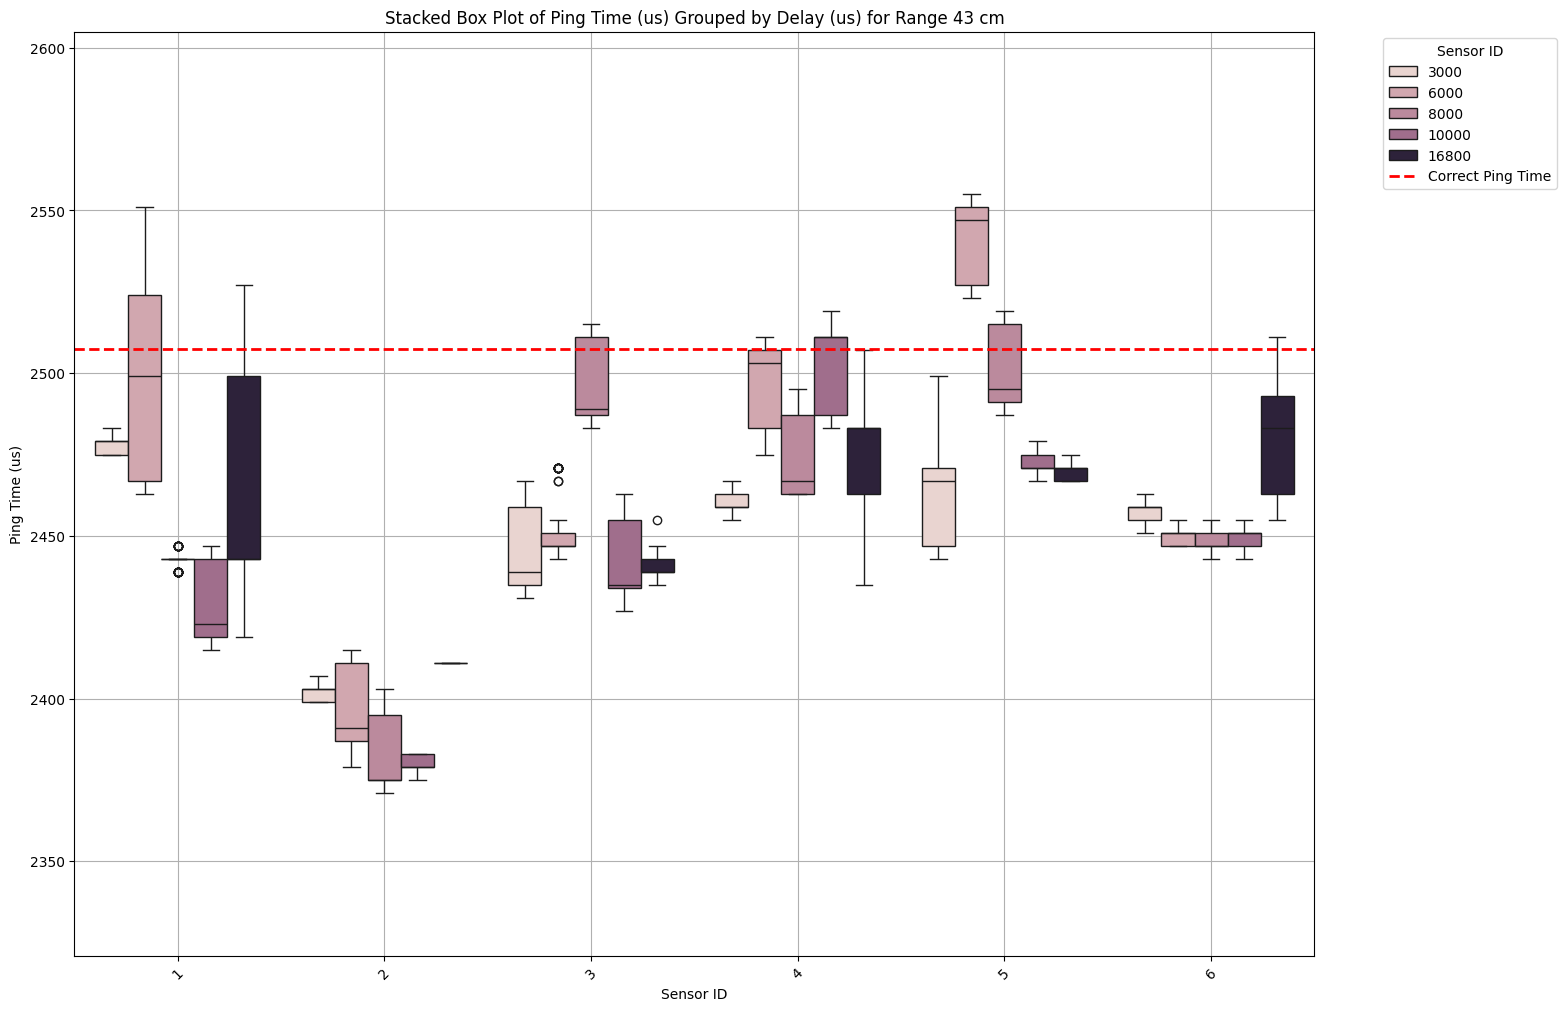

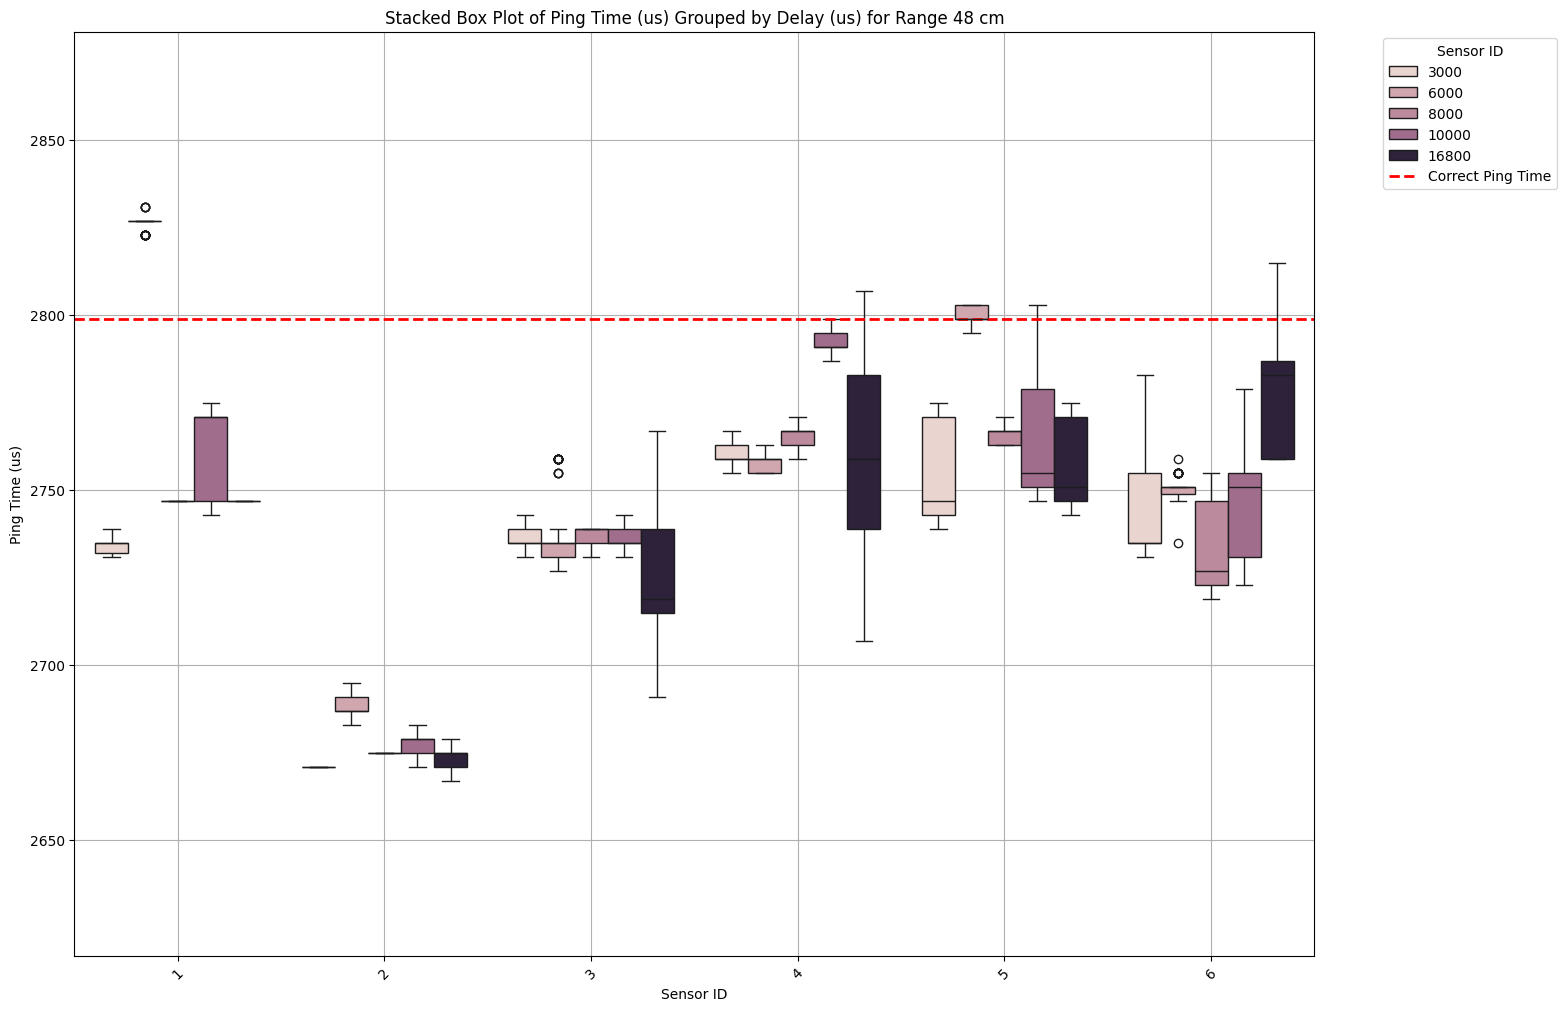

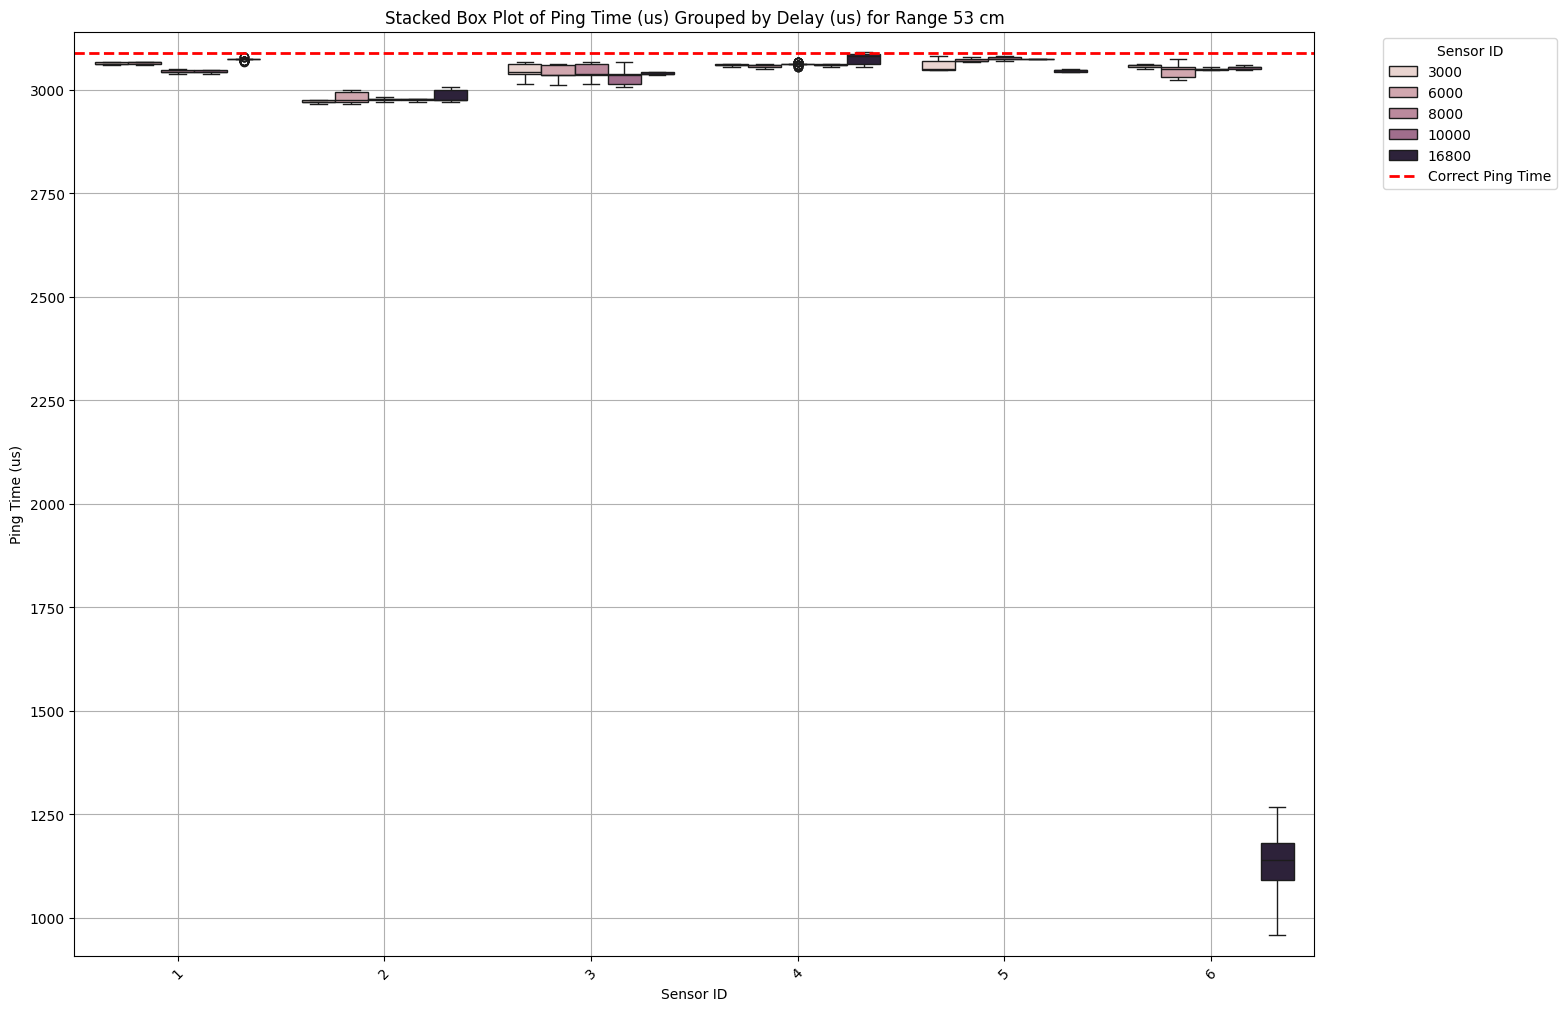

In [ ]:
visualize_stacked_box_plots(df_removed_outliers)

### Investigate df outlier removed

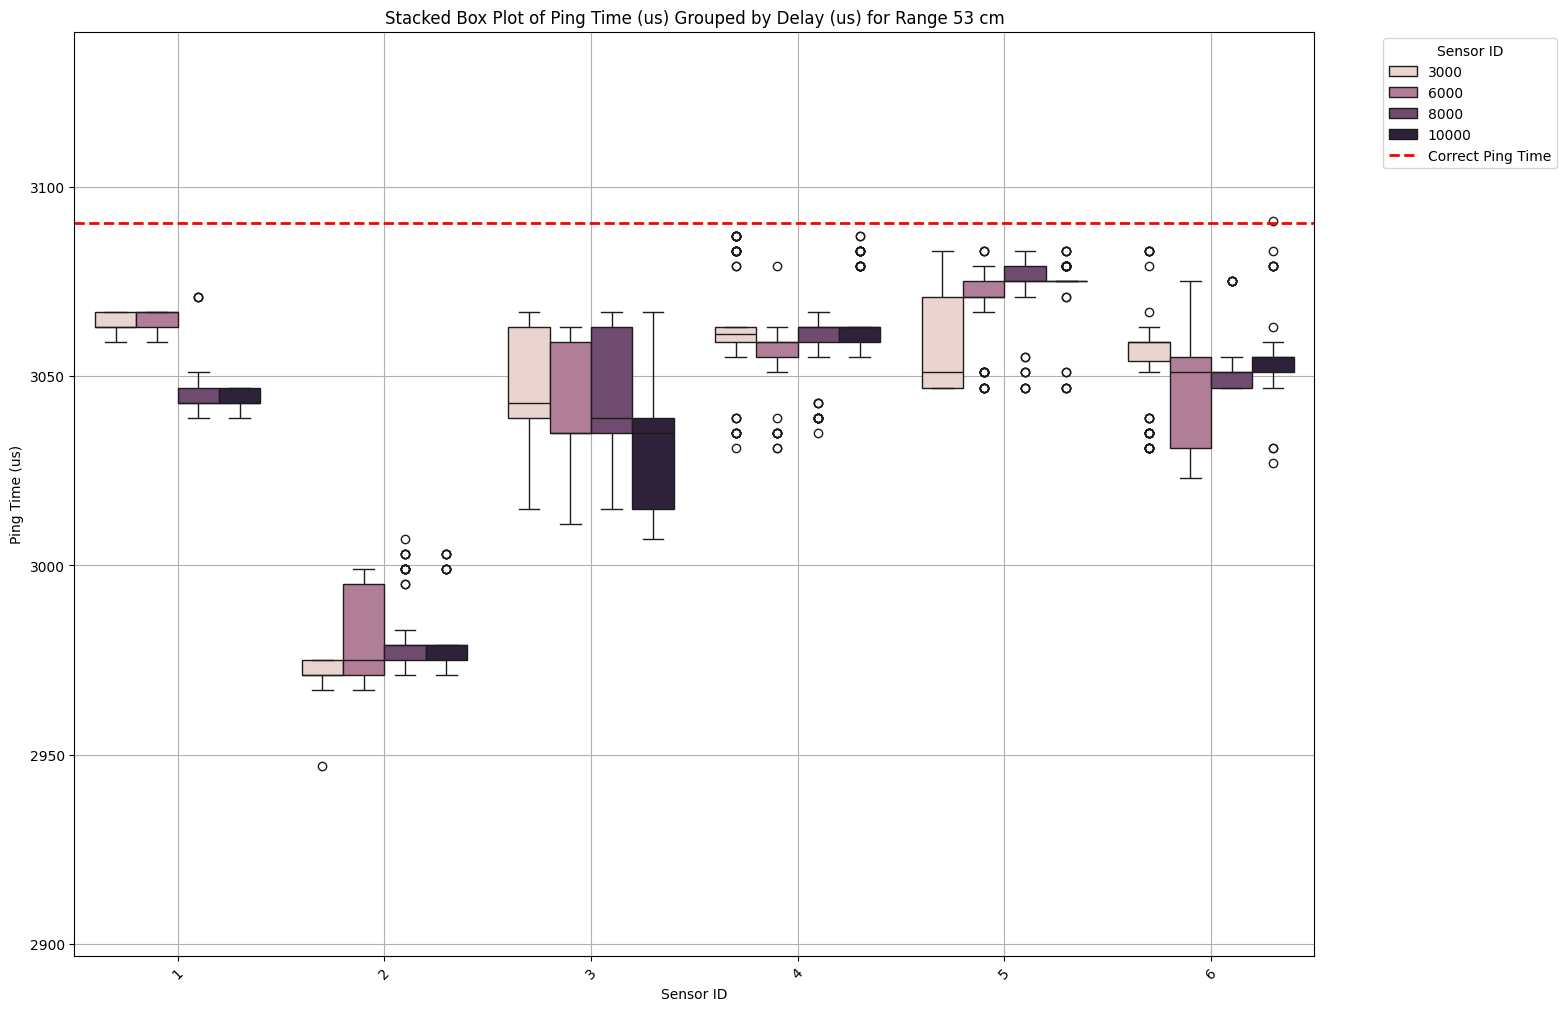

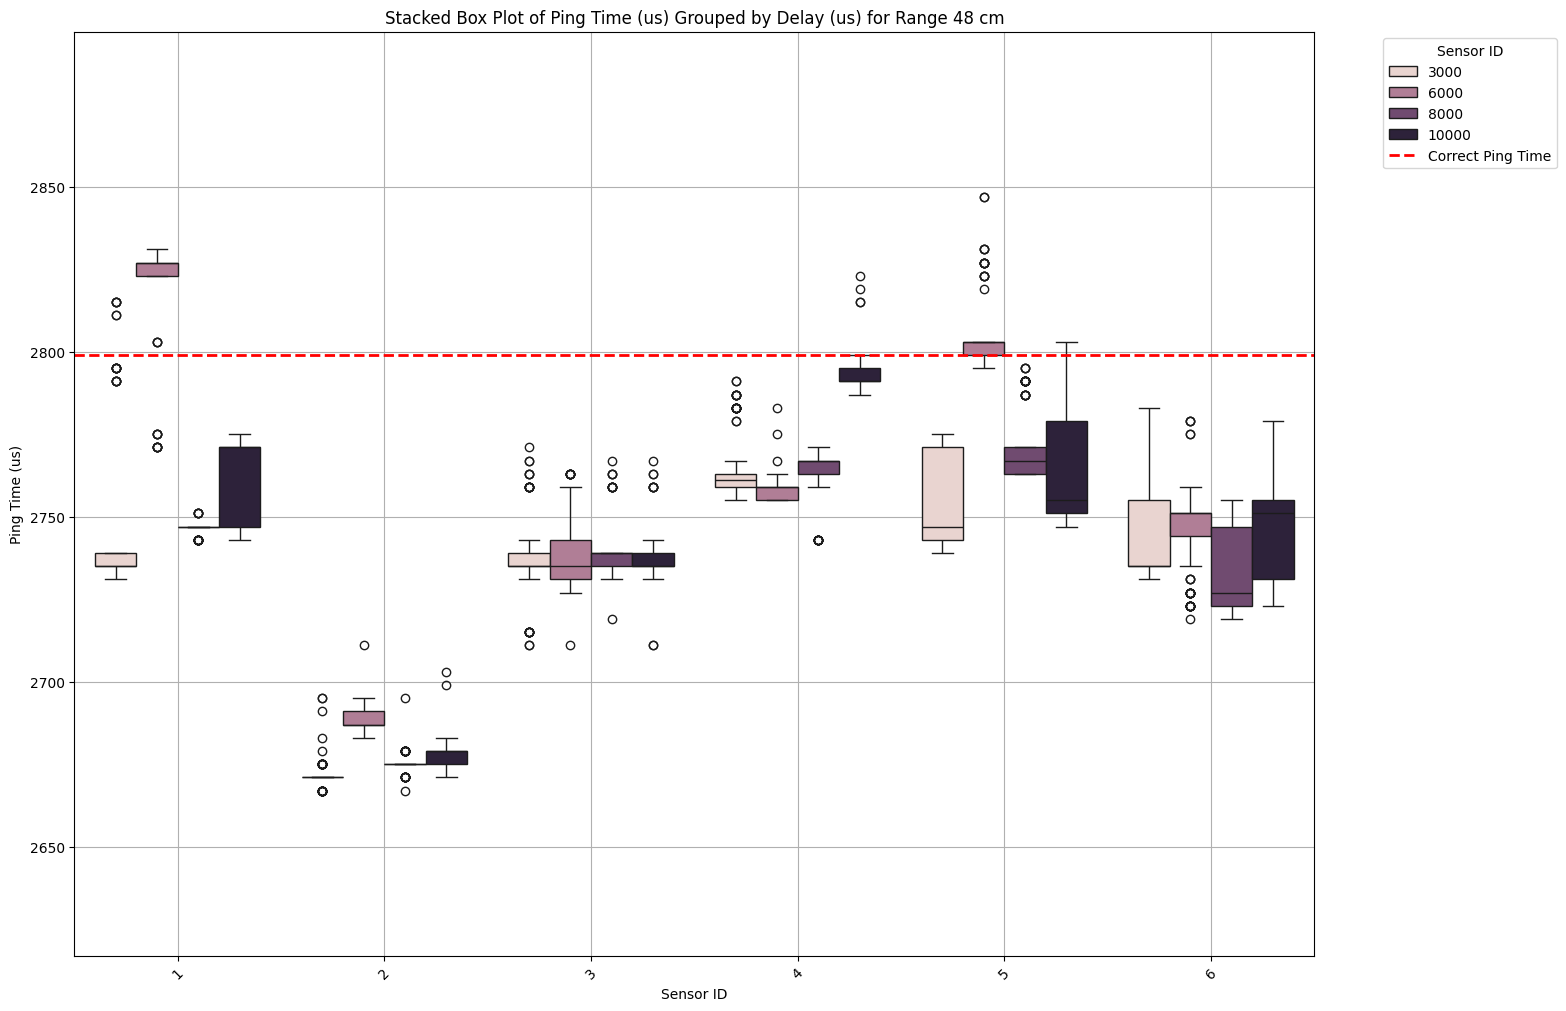

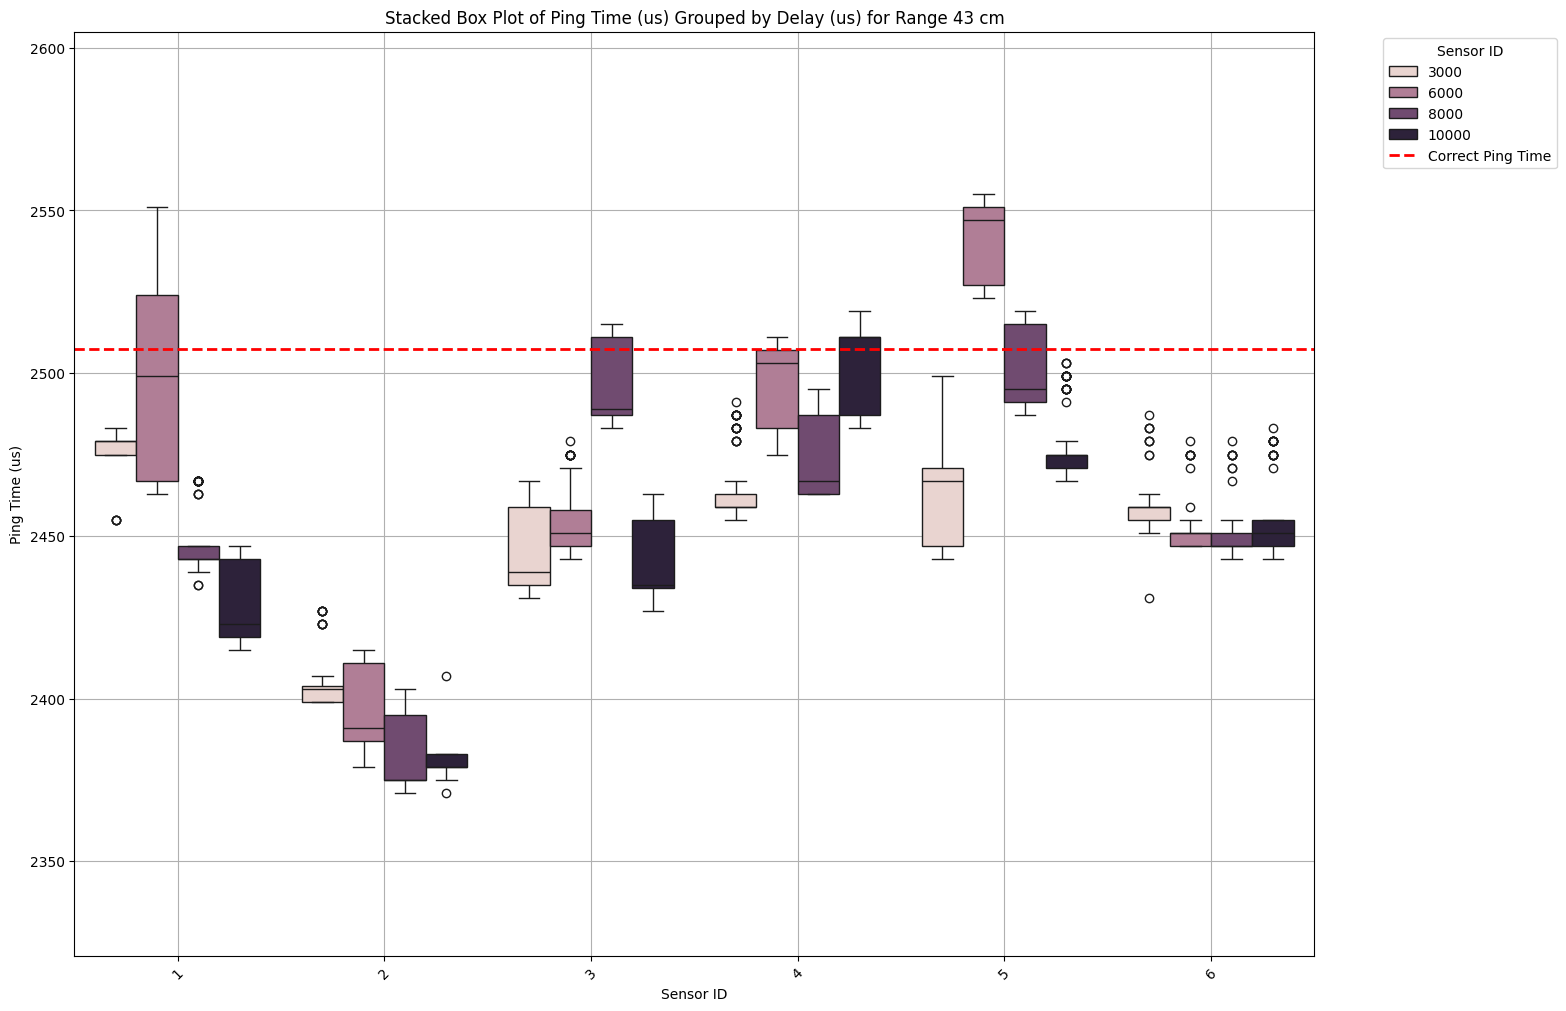

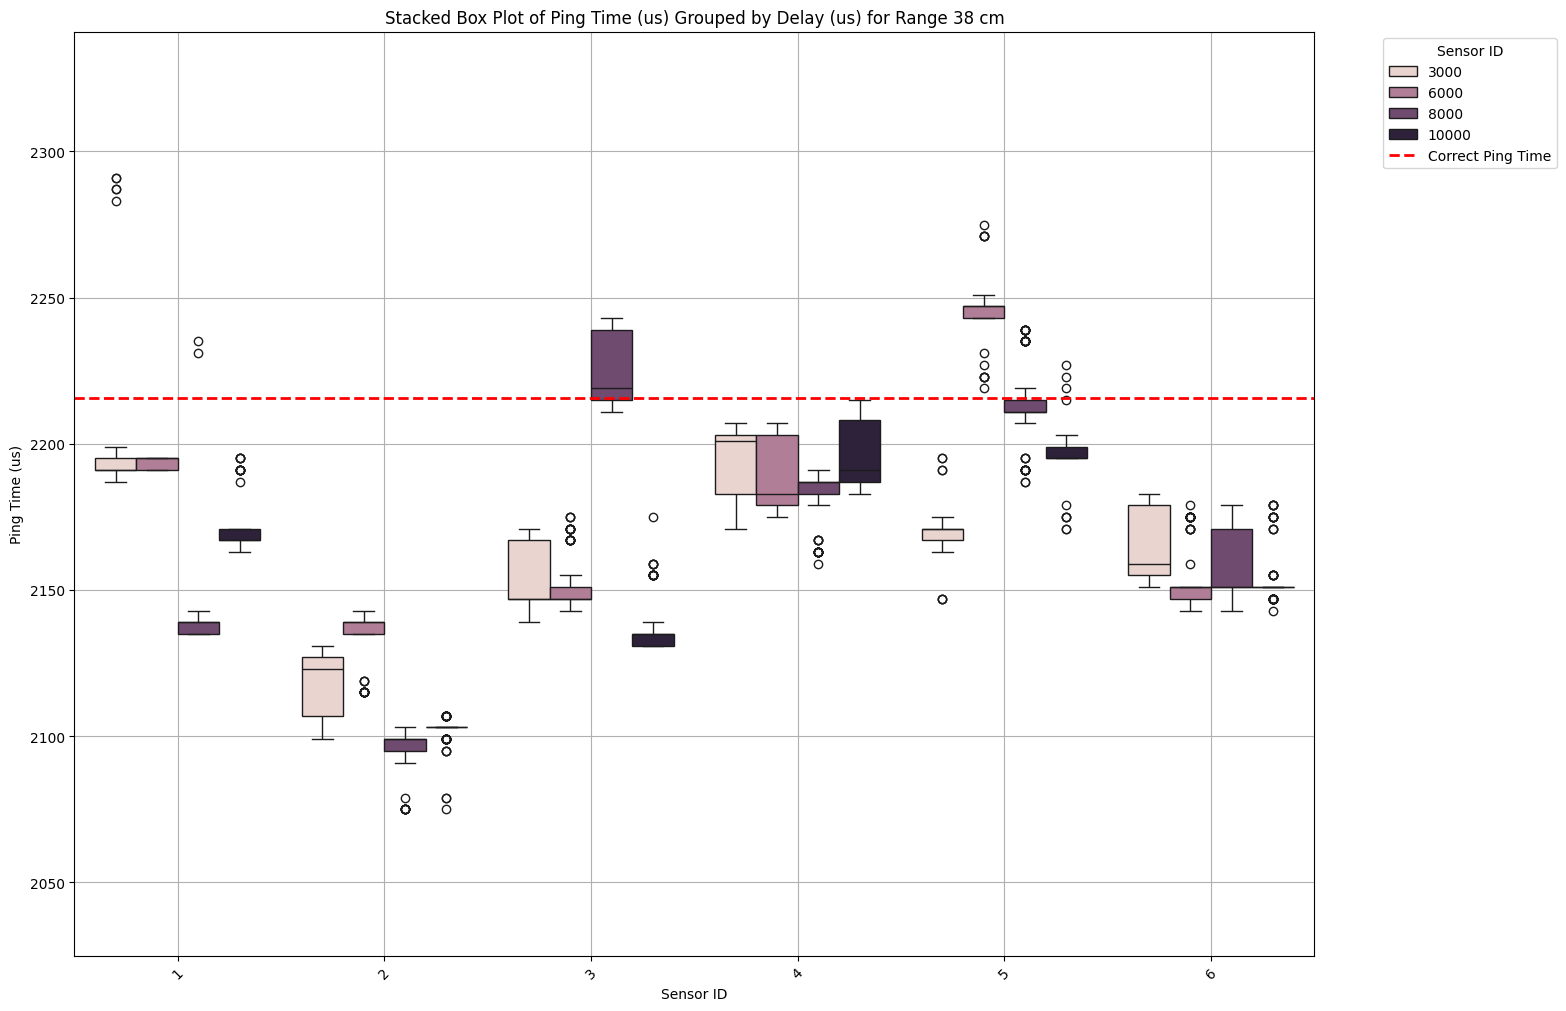

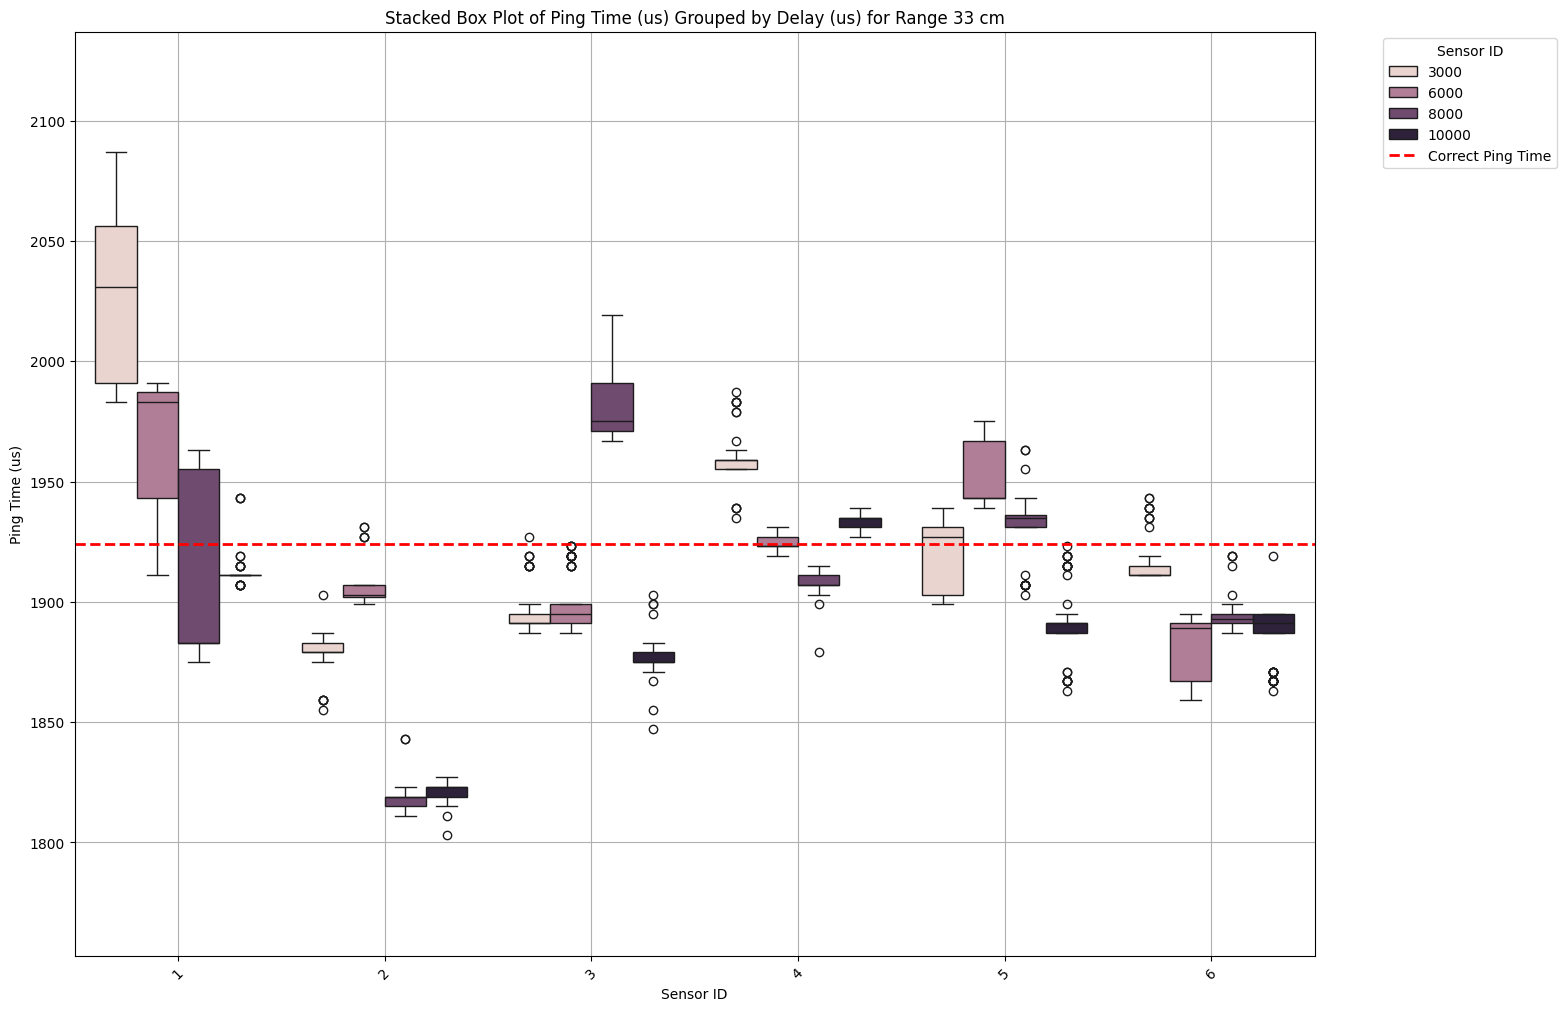

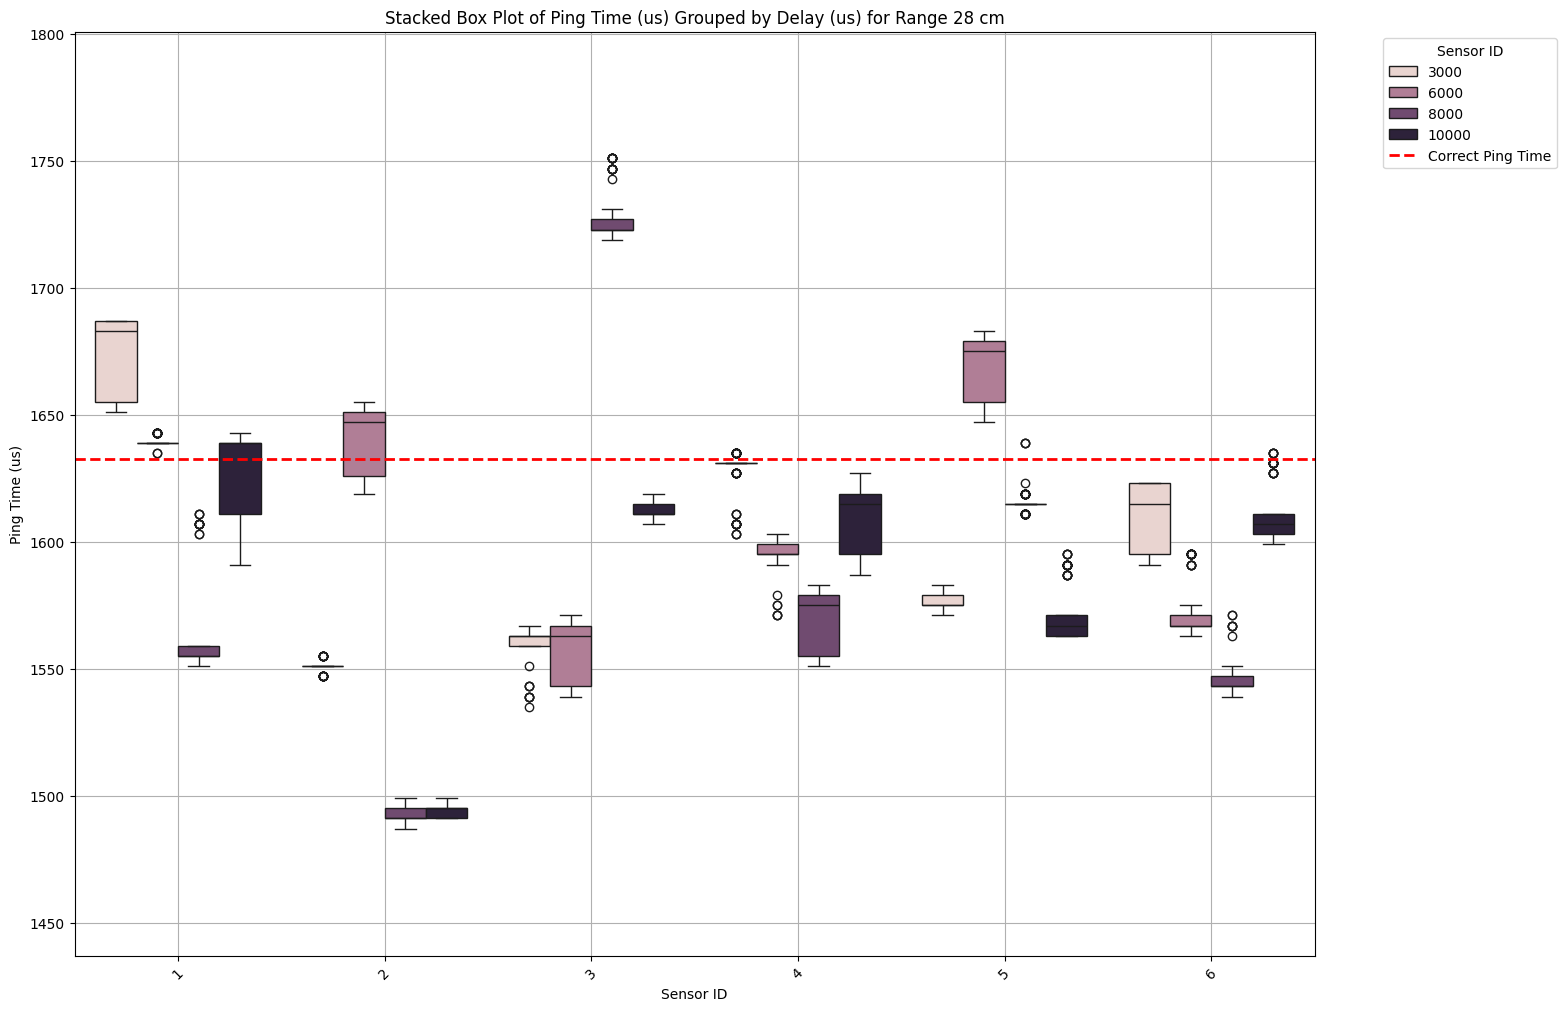

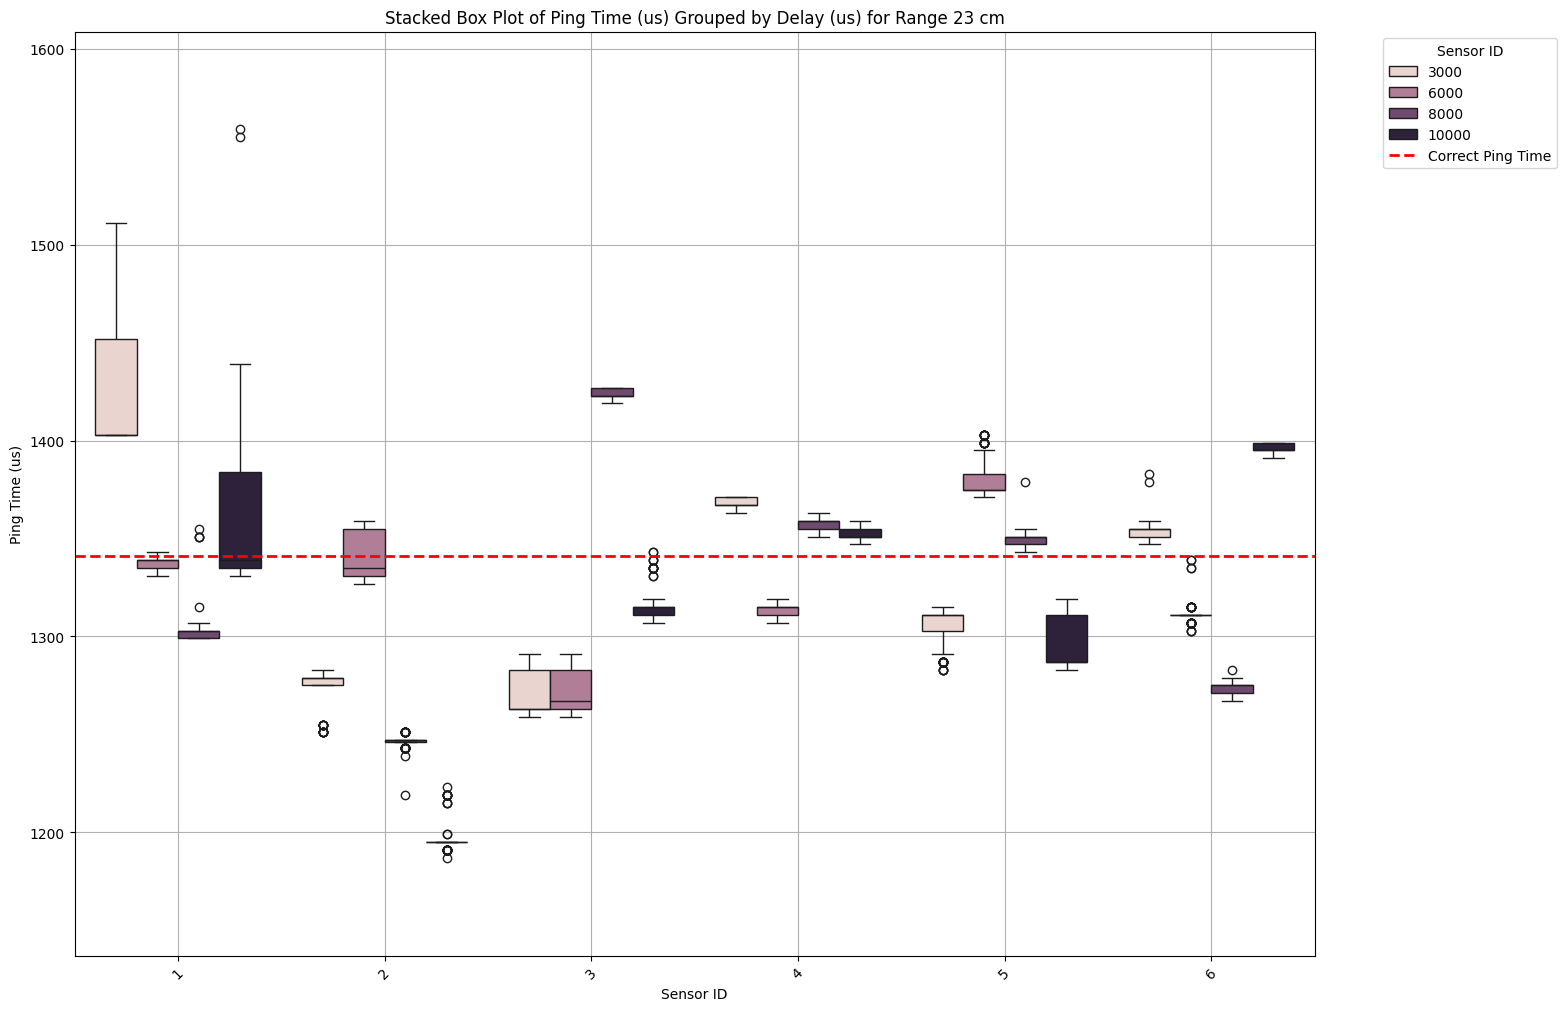

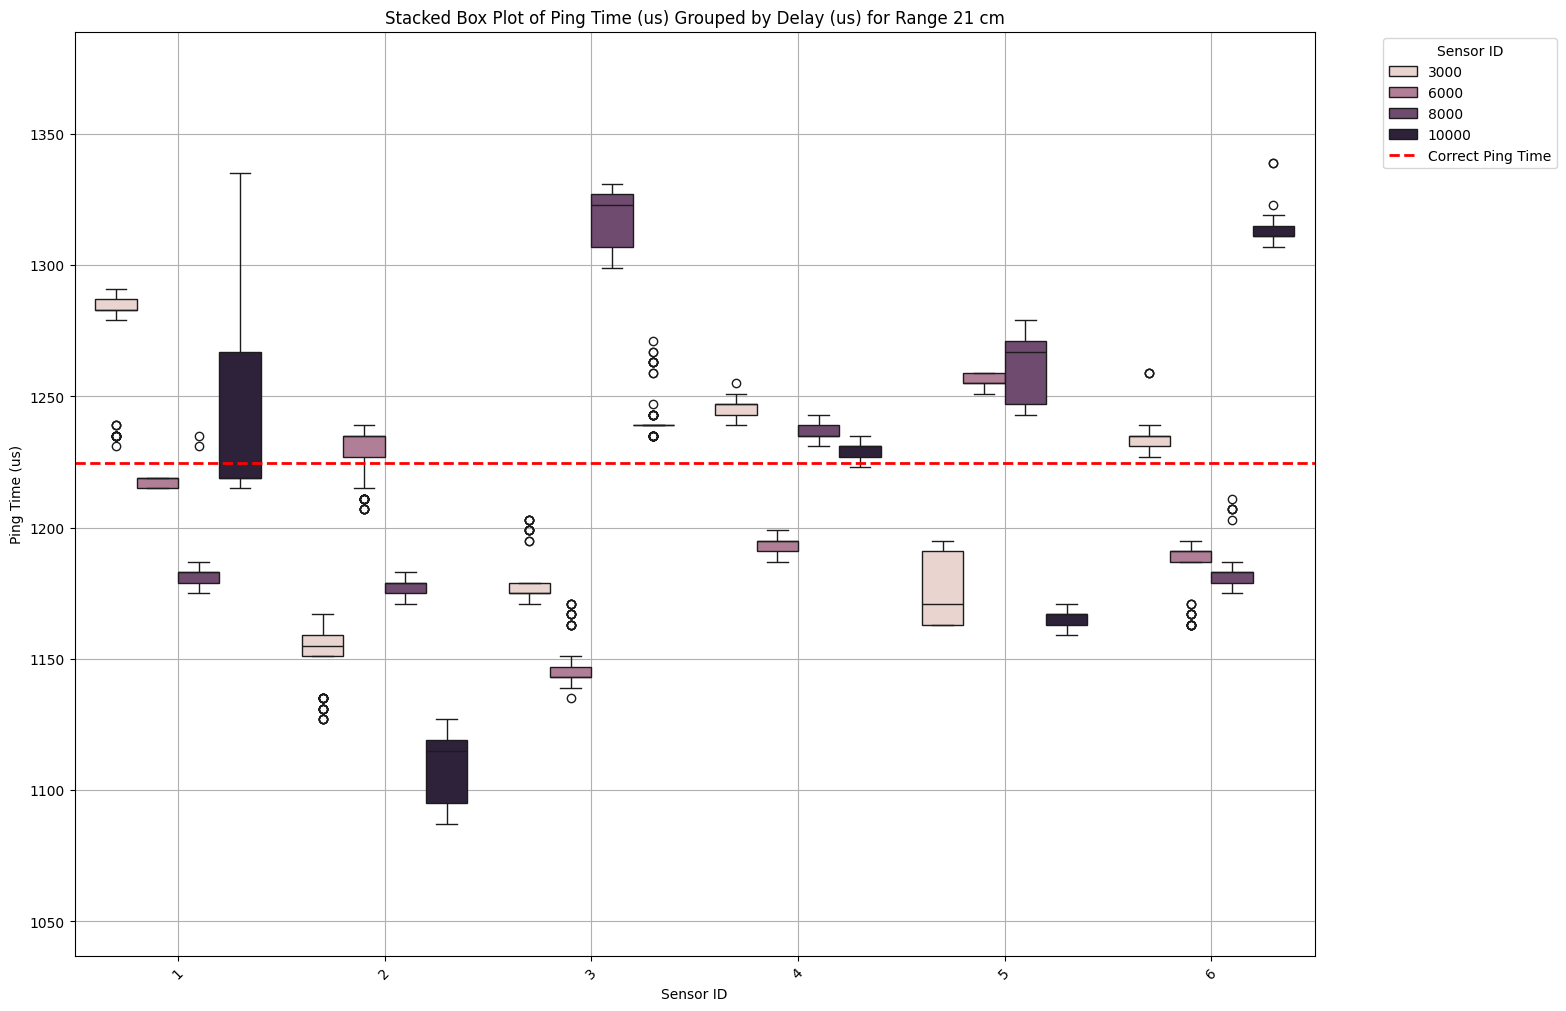

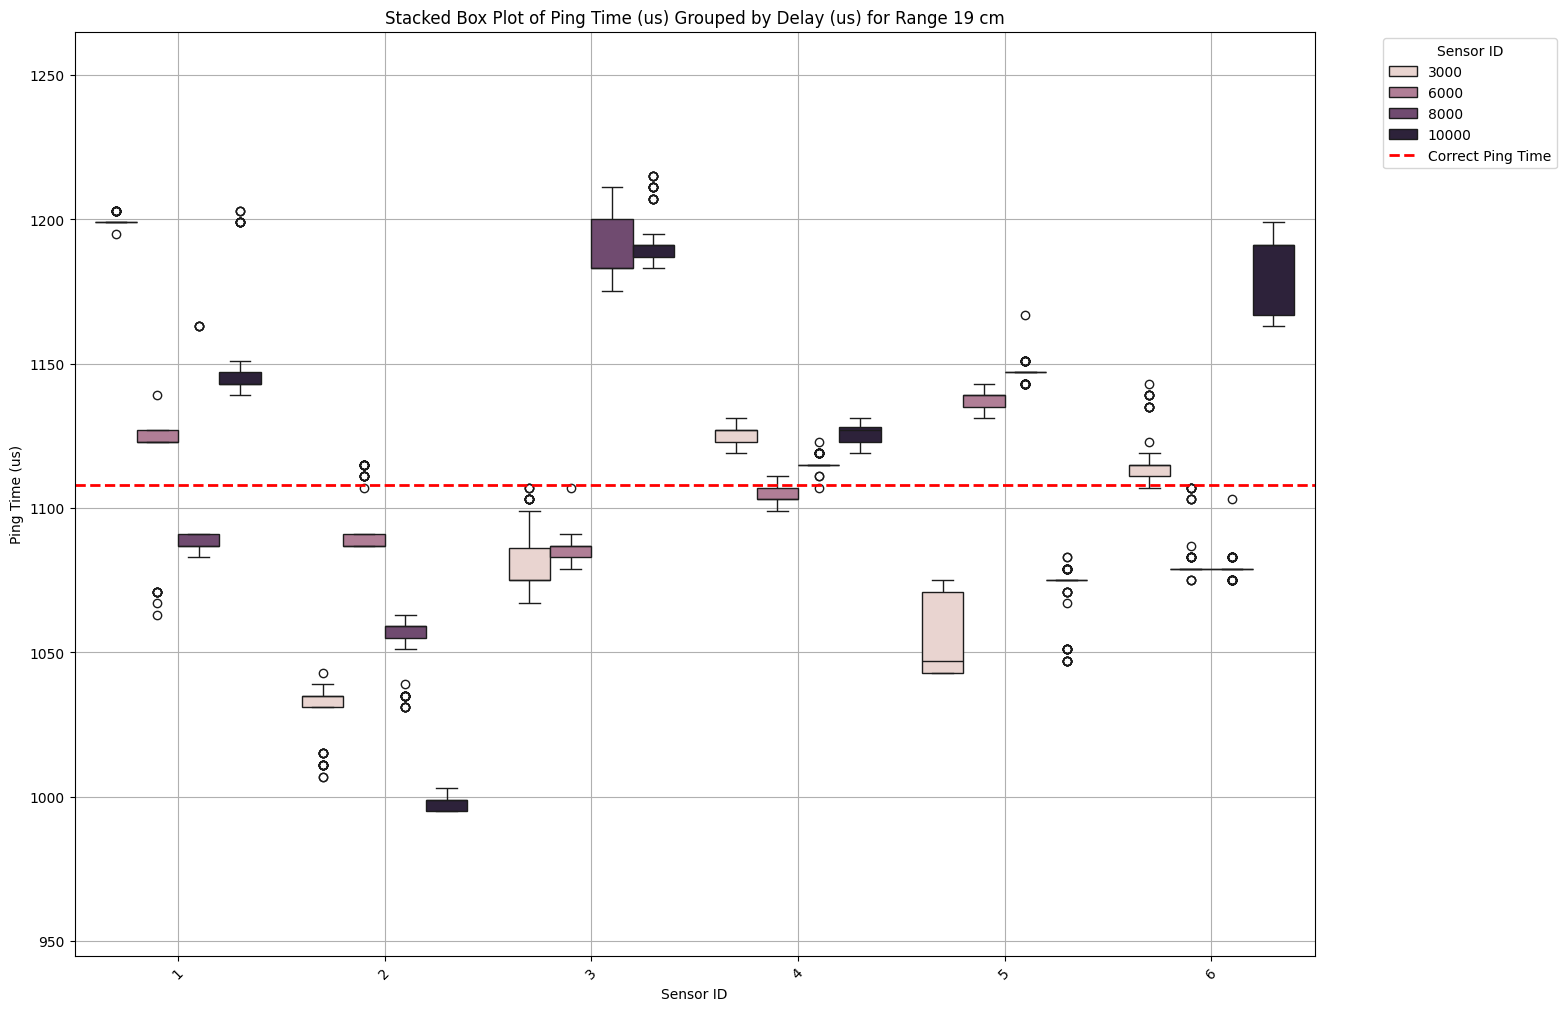

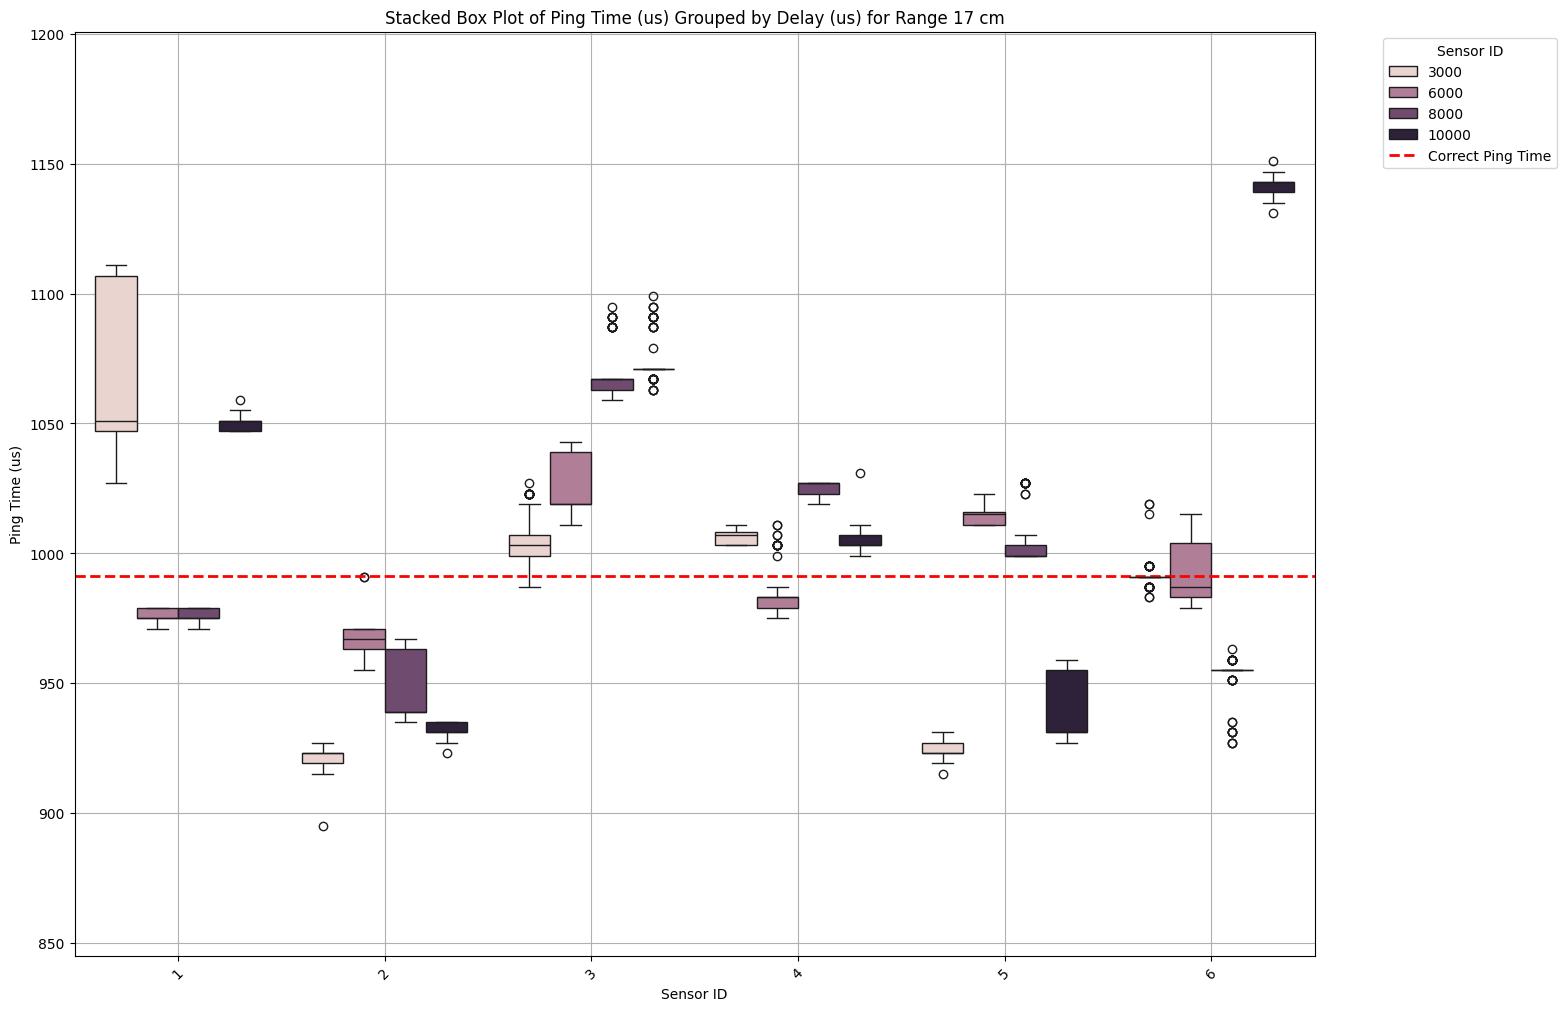

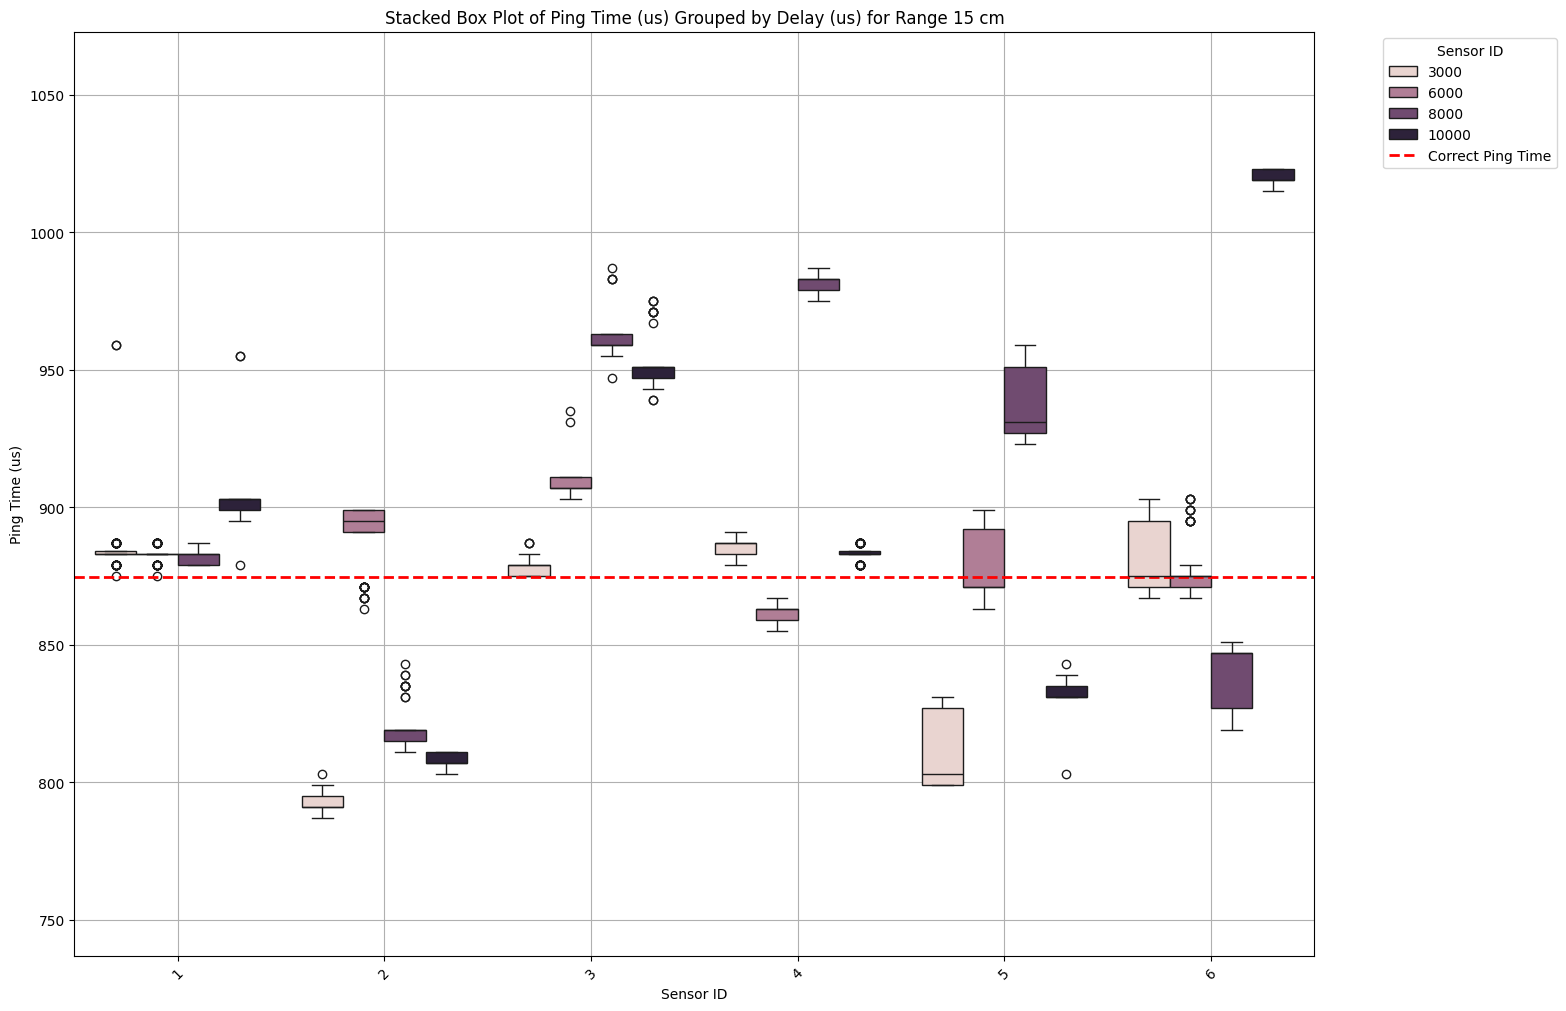

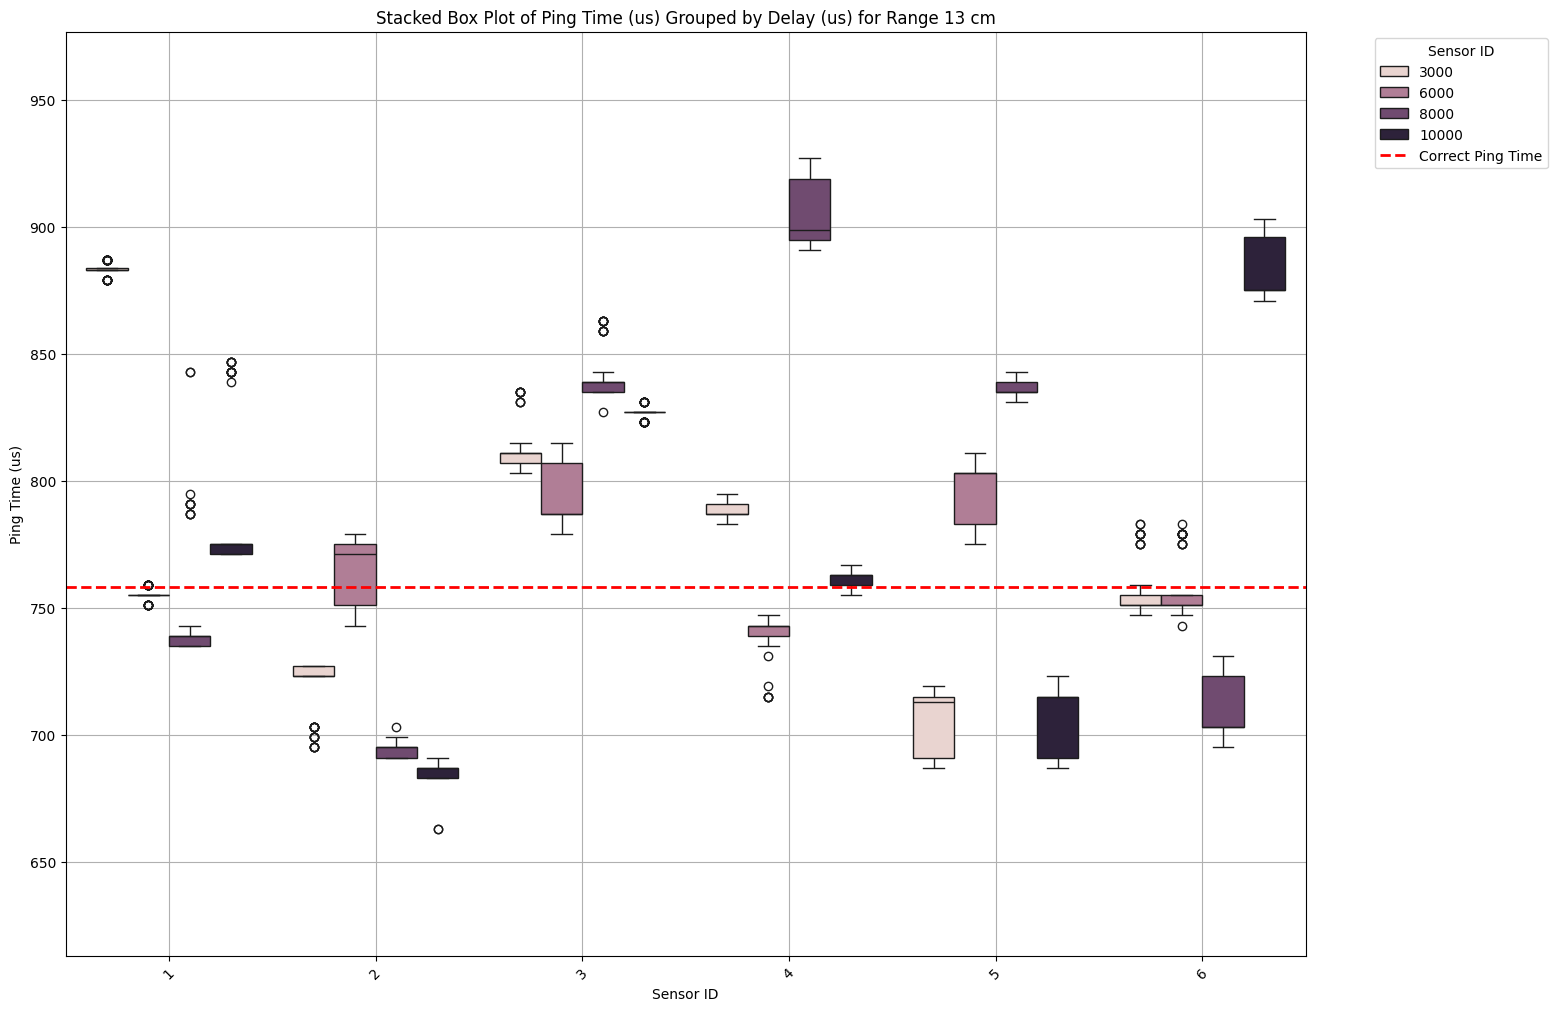

In [ ]:
visualize_stacked_box_plots(df_removed_outliers)

Based on this boxplot we can these sensors has a lot of variability and we may be able to capture their characteristics.

### Investigate outliers

In [ ]:
df_outliers_lower

,Trial,Ping Duration,Distance (cm),Ping Time (us),Delay (us),Steps,Arduino ID,Sensor ID,Range (cm),Color of sensor,Surface material
31100,0,6148,15,879,3000,10480,1,1,13,b,wood
31101,1,6148,15,879,3000,10480,1,1,13,b,wood
31102,2,6148,15,879,3000,10480,1,1,13,b,wood
31134,34,6124,15,879,3000,10480,1,1,13,b,wood
31137,37,6124,15,879,3000,10480,1,1,13,b,wood
...,...,...,...,...,...,...,...,...,...,...,...
32400,0,1368,7,439,16800,0,1,6,53,b,wood
32402,2,1492,9,559,16800,0,1,6,53,b,wood
32404,4,1560,11,627,16800,0,1,6,53,b,wood
32406,6,1656,12,727,16800,0,1,6,53,b,wood


In [ ]:
df_outliers_lower.groupby(['Sensor ID', 'Delay (us)'])['Ping Time (us)'].count()

Sensor ID  Delay (us)
1          3000          132
           6000          263
           8000           97
           10000          91
           16800         286
2          3000          248
           6000           54
           8000          136
           10000         175
           16800         314
3          3000           20
           6000            2
           8000            3
           10000         255
           16800         145
4          3000           96
           6000           21
           8000          125
           10000          22
           16800          25
5          3000           29
           6000           22
           8000          200
           10000         169
           16800          71
6          3000          106
           6000          204
           8000          165
           10000         105
           16800           5
Name: Ping Time (us), dtype: int64

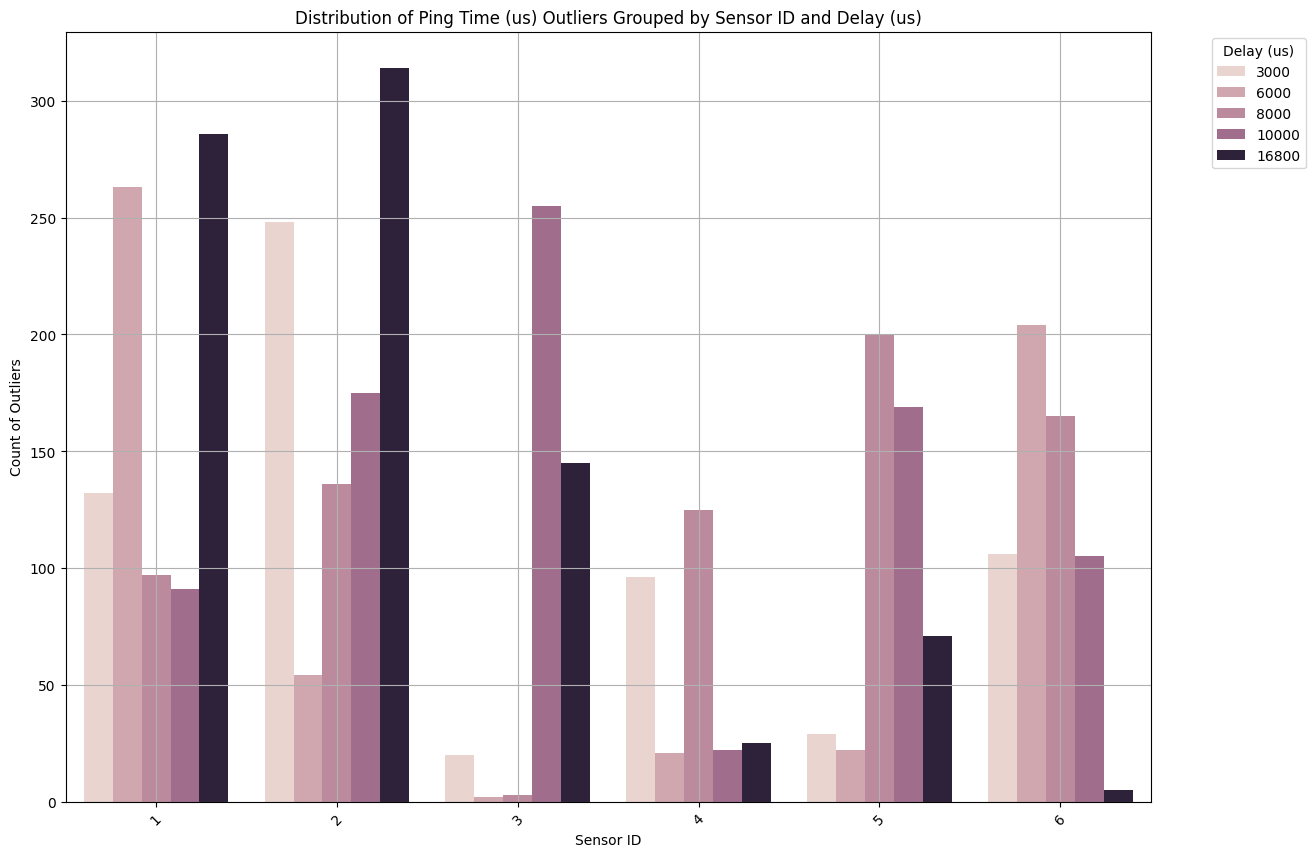

In [ ]:
# Group the outliers by 'Sensor ID' and 'Delay (us)'
grouped_outliers = df_outliers_lower.groupby(['Sensor ID', 'Delay (us)'])['Ping Time (us)'].count().reset_index()

# Plot the distribution of outliers
plt.figure(figsize=(14, 10))
sns.barplot(
    x='Sensor ID', 
    y='Ping Time (us)', 
    hue='Delay (us)', 
    data=grouped_outliers
)
plt.title('Distribution of Ping Time (us) Outliers Grouped by Sensor ID and Delay (us)')
plt.xlabel('Sensor ID')
plt.ylabel('Count of Outliers')
plt.legend(title='Delay (us)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_outliers_upper

,Trial,Ping Duration,Distance (cm),Ping Time (us),Delay (us),Steps,Arduino ID,Sensor ID,Range (cm),Color of sensor,Surface material
31106,6,6128,15,887,3000,10480,1,1,13,b,wood
31109,9,6128,15,887,3000,10480,1,1,13,b,wood
31112,12,6128,15,887,3000,10480,1,1,13,b,wood
31115,15,6128,15,887,3000,10480,1,1,13,b,wood
31116,16,6128,15,887,3000,10480,1,1,13,b,wood
...,...,...,...,...,...,...,...,...,...,...,...
32401,1,2660,30,1731,16800,0,1,6,53,b,wood
32403,3,2592,29,1659,16800,0,1,6,53,b,wood
32405,5,2520,27,1595,16800,0,1,6,53,b,wood
32407,7,2428,26,1495,16800,0,1,6,53,b,wood


In [ ]:
df_outliers_upper.groupby(['Sensor ID', 'Delay (us)'])['Ping Time (us)'].count()

Sensor ID  Delay (us)
1          3000          172
           6000          273
           8000          148
           10000         136
           16800         295
2          3000          185
           6000           30
           8000          134
           10000         164
           16800         249
3          3000           84
           6000           81
           8000           62
           10000         314
           16800         186
4          3000          147
           6000           20
           8000           97
           10000          52
           16800          52
5          3000            4
           6000           45
           8000          220
           10000         238
           16800          56
6          3000          137
           6000          260
           8000          195
           10000         129
           16800          48
Name: Ping Time (us), dtype: int64

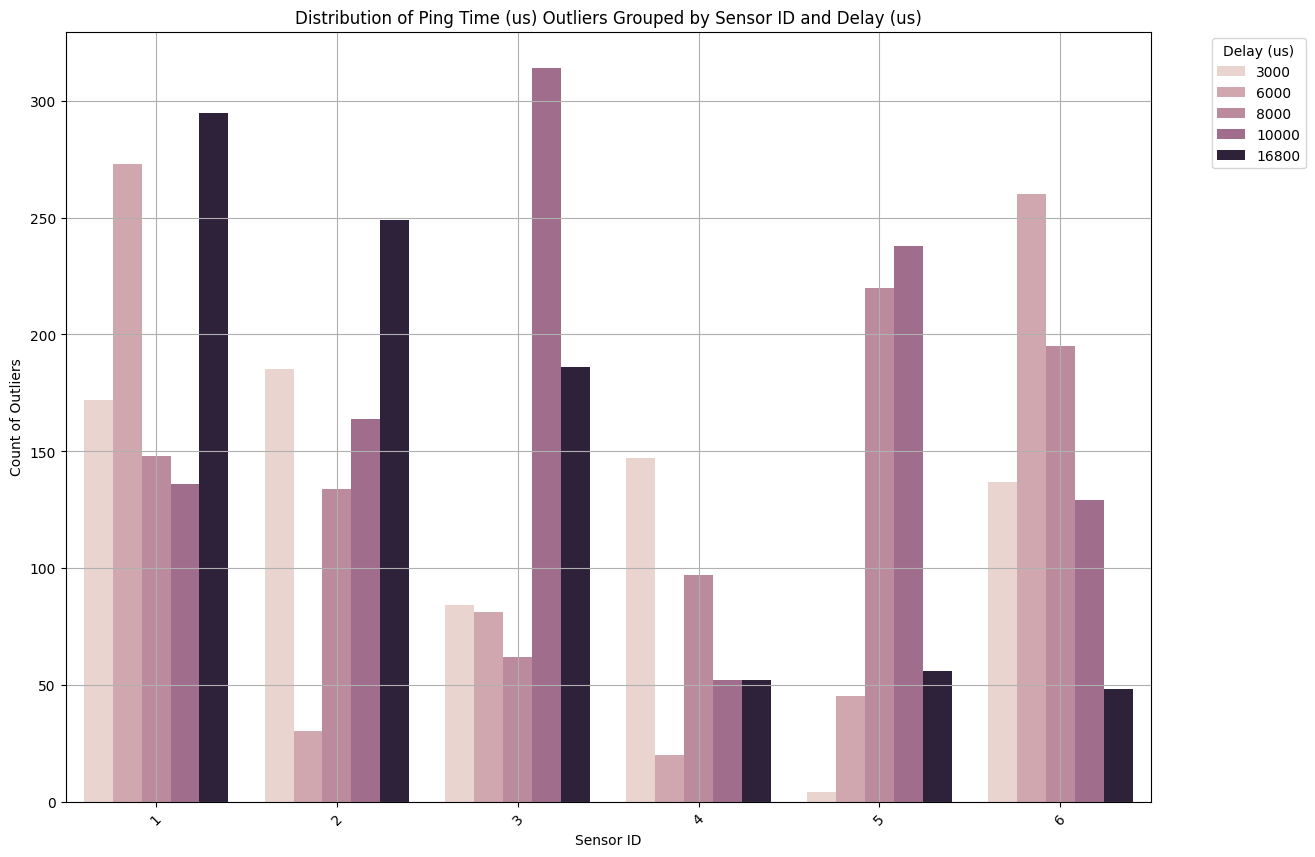

In [ ]:
# Group the outliers by 'Sensor ID' and 'Delay (us)'
grouped_upper_outliers = df_outliers_upper.groupby(['Sensor ID', 'Delay (us)'])['Ping Time (us)'].count().reset_index()

# Plot the distribution of outliers
plt.figure(figsize=(14, 10))
sns.barplot(
    x='Sensor ID', 
    y='Ping Time (us)', 
    hue='Delay (us)', 
    data=grouped_upper_outliers
)
plt.title('Distribution of Ping Time (us) Outliers Grouped by Sensor ID and Delay (us)')
plt.xlabel('Sensor ID')
plt.ylabel('Count of Outliers')
plt.legend(title='Delay (us)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## First Characterizing effrot

In [ ]:
df_removed_outliers

NameError: name 'df_removed_outliers' is not defined